In [3]:
from synth_tree_original.DECISION_TREE_CLASSIFIER import DistanceDecisionTree as dtc

In [1]:
pip install -i https://test.pypi.org/simple/ synth-tree-package==0.0.2

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for synth-tree-package==0.0.2 from https://test-files.pythonhosted.org/packages/e6/5e/4281ec4a1d90ef85eb80befaa94dea9ca7c49d61eb98cb601dc17c03a6ae/synth_tree_package-0.0.2-py3-none-any.whl.metadata
  Attempting uninstall: synth-tree-package
    Found existing installation: synth_tree_package 0.0.1
    Uninstalling synth_tree_package-0.0.1:
      Successfully uninstalled synth_tree_package-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score

In [5]:
path = './data/TCGA/'
df = pd.read_csv(path + "TCGA_skcm.csv")

data = df.iloc[:,1:]
orig_headers = list(data)
outcome_header = "OS_STATUS"

feature_names = list(data)
feature_names.remove(outcome_header)

one_vars = np.where(np.array([len(np.unique(x)) for x in np.array(data).T])==1)[0]
for i in [orig_headers[i] for i in one_vars]:
    feature_names.remove(i)
    
Xo = data[feature_names].values
y = data[outcome_header].values


cate_vars = np.where((np.array([len(np.unique(x)) for x in np.array(Xo).T])<=12) &
                    (np.array([len(np.unique(x)) for x in np.array(Xo).T])>2))[0]
cont_vars = np.where((np.array([len(np.unique(x)) for x in np.array(Xo).T])>12) |
                    (np.array([len(np.unique(x)) for x in np.array(Xo).T])<=2))[0]
cate_vars = np.setdiff1d(cate_vars,[10])
cate_vars = np.sort(np.append(cate_vars,27))
cont_vars = np.setdiff1d(cont_vars,[27])
cont_vars = np.sort(np.append(cont_vars,10))

X_cate = Xo[:,cate_vars]
X_cont = Xo[:,cont_vars]
names_cont = [feature_names[i] for i in cont_vars]
names_cate = [feature_names[i] for i in cate_vars] 


X_cont_min, X_cont_max = X_cont.min(axis=0), X_cont.max(axis=0)
X_cont = (X_cont-X_cont_min)/(X_cont_max - X_cont_min + 1e-9)
    
df_cate = [pd.get_dummies(Xo[:,i], drop_first=True).values for i in cate_vars]
X_cate = np.hstack(df_cate)
a = sum([list(np.repeat(names_cate[i],j)) for i,j in enumerate([x.shape[1] for x in df_cate])],[])
b = sum([list(range(i)) for i in [x.shape[1] for x in df_cate]],[])
names_cate = ['{}{}'.format(a[i],b[i]) for i in range(len(b))]     
    
X = np.hstack([X_cont,X_cate])
feature_names = sum([names_cont,names_cate],[]) 


print(X.shape, y.shape, len(feature_names))
list(zip(feature_names,[len(np.unique(X[:,i])) for i in range(X.shape[1])]))

(388, 73) (388,) 73


[('AGE', 69),
 ('DAYS_TO_COLLECTION', 357),
 ('ETHNICITY', 2),
 ('FORM_COMPLETION_DATE', 104),
 ('FRACTION_GENOME_ALTERED', 372),
 ('HISTORY_NEOADJUVANT_TRTYN', 2),
 ('HISTORY_OTHER_MALIGNANCY', 2),
 ('ICD_10', 39),
 ('ICD_O_3_HISTOLOGY', 10),
 ('ICD_O_3_SITE', 35),
 ('INITIAL_PATHOLOGIC_DX_YEAR', 31),
 ('NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 2),
 ('OCT_EMBEDDED', 2),
 ('OS_MONTHS', 368),
 ('PRIMARY_MELANOMA_KNOWN_DX', 2),
 ('PROSPECTIVE_COLLECTION', 2),
 ('RADIATION_TREATMENT_ADJUVANT', 2),
 ('RETROSPECTIVE_COLLECTION', 2),
 ('SAMPLE_COUNT', 2),
 ('SAMPLE_INITIAL_WEIGHT', 76),
 ('SAMPLE_TYPE', 2),
 ('SAMPLE_TYPE_ID', 2),
 ('SEX', 2),
 ('SUBMITTED_TUMOR_DX_DAYS_TO', 260),
 ('VIAL_NUMBER', 2),
 ('AJCC_NODES_PATHOLOGIC_PN0', 2),
 ('AJCC_NODES_PATHOLOGIC_PN1', 2),
 ('AJCC_NODES_PATHOLOGIC_PN2', 2),
 ('AJCC_NODES_PATHOLOGIC_PN3', 2),
 ('AJCC_NODES_PATHOLOGIC_PN4', 2),
 ('AJCC_NODES_PATHOLOGIC_PN5', 2),
 ('AJCC_NODES_PATHOLOGIC_PN6', 2),
 ('AJCC_NODES_PATHOLOGIC_PN7', 2),
 ('AJCC_NODES_

In [6]:
df

,Unnamed: 0,AGE,AJCC_NODES_PATHOLOGIC_PN,AJCC_STAGING_EDITION,DAYS_TO_COLLECTION,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,ETHNICITY,FORM_COMPLETION_DATE,FRACTION_GENOME_ALTERED,HISTORY_NEOADJUVANT_TRTYN,HISTORY_OTHER_MALIGNANCY,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,INITIAL_PATHOLOGIC_DX_YEAR,IS_FFPE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,OCT_EMBEDDED,OS_MONTHS,OS_STATUS,PRIMARY_MELANOMA_KNOWN_DX,PROSPECTIVE_COLLECTION,RACE,RADIATION_TREATMENT_ADJUVANT,RETROSPECTIVE_COLLECTION,SAMPLE_COUNT,SAMPLE_INITIAL_WEIGHT,SAMPLE_TYPE,SAMPLE_TYPE_ID,SEX,SUBMITTED_TUMOR_DX_DAYS_TO,TISSUE_SOURCE_SITE,TUMOR_SITE,VIAL_NUMBER
0,1,34,9,7,108,0,2,77,0.5784,1,1,37,1,33,1,2013,1,1,1,15.70,1,1,2,3,2,1,1,400,1,2,1,0,9,8,1
1,2,56,2,7,457,0,2,39,0.3233,1,1,26,1,22,1,2012,1,2,2,22.93,0,2,2,3,1,1,1,70,1,2,2,254,4,9,1
2,3,66,1,7,3453,0,2,29,0.3384,1,1,1,1,1,1,2004,1,2,2,29.04,0,2,1,3,1,2,1,70,1,2,2,536,3,9,1
3,5,75,9,7,2994,0,2,11,0.0580,1,1,36,1,32,1,2003,1,2,2,23.75,0,2,1,3,1,2,1,80,1,2,2,80,3,11,1
4,6,58,4,7,92,0,2,63,0.3817,1,1,37,1,33,1,2012,1,2,2,18.17,1,2,1,3,1,2,1,80,1,2,2,14,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,474,85,10,7,203,0,2,78,0.2086,1,2,13,2,12,1,2013,1,1,2,20.17,1,2,2,3,1,1,1,220,2,1,2,0,19,2,1
384,475,45,7,4,5332,0,2,1,0.5553,1,1,39,1,35,1,1996,1,2,2,176.41,0,2,1,3,1,2,1,170,1,2,2,4679,5,9,1
385,476,46,3,6,1086,0,2,74,0.2394,1,1,39,1,35,1,2009,1,2,1,26.71,0,2,1,3,1,2,1,70,1,2,1,631,10,2,1
386,478,46,1,6,2339,0,2,8,0.1207,1,1,36,1,32,1,2004,1,2,2,115.87,1,2,1,3,1,2,1,50,1,2,2,1633,7,2,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# MLM Start

In [49]:
from generalized_mlm_2 import MixtureLinearModel

2024-05-27 16:28:48.408749: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 16:28:48.498694: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 16:28:48.501802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 16:28:50.493006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
clfs = [clf_1, clf_2, clf_3]

sorted_clf = []
for i in clfs:
    sorted_clf.append((i, roc_auc_score(i.predict(X_test), y_test)))
sorted_clf = sorted(sorted_clf, key=lambda x: x[1])

In [15]:
sorted_clf

[(GradientBoostingClassifier(), 0.7479619565217391),
 (RandomForestClassifier(), 0.7514950166112956),
 (MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
                solver='lbfgs'),
  0.8134920634920635)]

In [16]:
avg_variance = np.mean(np.var(X_train, axis=0))

In [17]:
MLM = MixtureLinearModel(sorted_clf, verbose=True)

In [18]:
MLM.compute_kmeans_CELL(X_train, K=13, random_seed=0)

73 (73,)
# of CELL:26 / min size:6 / avg size:11.9 / max size:19 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
MLM.fit_LocalModels(X_train, y_train, 
                    eps=avg_variance, num_noise_samp=100, 
                    classification=True, alpha=0, max_iter=10000, random_seed=0)

Len of clf: 26


100%|██████████| 26/26 [00:00<00:00, 312.09it/s]


cluster: 0 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 1 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 2 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 3 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 4 model: RandomForestClassifier()
cluster: 5 model: RandomForestClassifier()
cluster: 6 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 7 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 8 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
cluster: 9 model: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_s

  0%|          | 0/26 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 27%|██▋       | 7/26 [00:00<00:00, 65.81it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.56905D-01

At iterate    1    f=  5.72221D-01    |proj g|=  6.06522D-02

At iterate    2    f=  5.50401D-01    |proj g|=  5.19383D-02

At iterate    3    f=  4.39989D-01    |proj g|=  1.37121D-01

At iterate    4    f=  3.47991D-01    |proj g|=  1.33231D-01

At iterate    5    f=  1.78039D-01    |proj g|=  5.69949D-02

At iterate    6    f=  1.07655D-01    |proj g|=  2.60137D-02

At iterate    7    f=  6.45759D-02    |proj g|=  1.06375D-02

At iterate    8    f=  3.79004D-02    |proj g|=  4.21217D-03

At iterate    9    f=  2.01670D-02    |proj g|=  1.98609D-03

At iterate   10    f=  9.87092D-03    |proj g|=  8.42262D-04

At iterate   11    f=  4.75410D-03    |proj g|=  1.02391D-03

At iterate   12    f=  2.36284D-03    |proj g|=  6.42062D-04

At iterate   13    f=  1.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  7.17595D-02

At iterate    1    f=  6.79248D-01    |proj g|=  9.54712D-02

At iterate    2    f=  5.97972D-01    |proj g|=  8.64712D-02

At iterate    3    f=  3.04290D-01    |proj g|=  2.62565D-02

At iterate    4    f=  2.38231D-01    |proj g|=  1.54070D-02

At iterate    5    f=  1.54904D-01    |proj g|=  1.03839D-02

At iterate    6    f=  9.70235D-02    |proj g|=  1.09982D-02

At iterate    7    f=  6.43017D-02    |proj g|=  4.04842D-03

At iterate    8    f=  4.40191D-02    |proj g|=  1.58995D-03

At iterate    9    f=  2.97986D-02    |proj g|=  1.02190D-03

At iterate   10    f=  1.80308D-02    |proj g|=  1.51041D-03

At iterate   11    f=  8.65764D-03    |proj g|=  1.38945D-03

At iterate   12    f=  8.41012D-03    |proj g|=  4.92619D-04

At iterate   13    f=  5.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.



At iterate    7    f=  3.86768D-02    |proj g|=  2.42944D-03

At iterate    8    f=  2.42436D-02    |proj g|=  1.30897D-03

At iterate    9    f=  1.59337D-02    |proj g|=  2.31117D-03

At iterate   10    f=  8.10128D-03    |proj g|=  2.27144D-03

At iterate   11    f=  5.64112D-03    |proj g|=  1.54190D-03

At iterate   12    f=  2.86895D-03    |proj g|=  4.63307D-04

At iterate   13    f=  1.63987D-03    |proj g|=  9.69413D-04

At iterate   14    f=  6.49818D-04    |proj g|=  4.52154D-04

At iterate   15    f=  3.71087D-04    |proj g|=  2.07651D-04

At iterate   16    f=  2.14325D-04    |proj g|=  8.85796D-05

At iterate   17    f=  1.23983D-04    |proj g|=  3.38875D-05

At iterate   18    f=  7.08748D-05    |proj g|=  1.49986D-05

At iterate   19    f=  3.74571D-05    |proj g|=  1.26397D-05

At iterate   20    f=  1.90824D-05    |proj g|=  7.03967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 62%|██████▏   | 16/26 [00:00<00:00, 74.34it/s]


At iterate   25    f=  6.10188D-05    |proj g|=  1.05643D-05

At iterate   26    f=  2.99900D-05    |proj g|=  4.77592D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     26     32      1     0     0   4.776D-06   2.999D-05
  F =   2.9989973962371498E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.13422D-01

At iterate    1    f=  6.64446D-01    |proj g|=  7.43157D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     20     25      1     0     0   5.258D-06   5.995D-05
  F =   5.9945709404041637E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.61349D-01

At iterate    1    f=  5.65670D-01    |proj g|=  1.37566D-01

At iterate    2    f=  4.66276D-01    |proj g|=  9.30622D-02

At iterate    3    f=  4.19274D-01    |proj g|=  3.46881D-02

At iter

100%|██████████| 26/26 [00:00<00:00, 78.87it/s]


In [20]:
pred_lmm_train = MLM.predict(X_train, covariance_tied=False, uniform_prior=False)
pred_lmm_test = MLM.predict(X_test, covariance_tied=False, uniform_prior=False)

100%|██████████| 26/26 [00:00<00:00, 881.96it/s]


In [21]:
print('MLM-CELL: Train RMSE:{:3.3f} / Test RMSE:{:3.3f}'.format(
            roc_auc_score(y_train,np.array(pred_lmm_train)),
            roc_auc_score(y_test,np.array(pred_lmm_test))))

MLM-CELL: Train RMSE:1.000 / Test RMSE:0.755


In [22]:
MLM.fit_MergedLocalModels(10, classification=True, alpha=0, max_iter=10000, random_seed=0)

  0%|          | 0/26 [00:00<?, ?it/s]/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
100%|██████████| 26/26 [00:00<00:00, 321.30it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inve

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.68212D-01

At iterate    1    f=  6.39606D-01    |proj g|=  5.96318D-02

At iterate    2    f=  5.75592D-01    |proj g|=  6.24334D-02

At iterate    3    f=  4.35866D-01    |proj g|=  1.04588D-01

At iterate    4    f=  3.51845D-01    |proj g|=  6.91284D-02

At iterate    5    f=  2.98320D-01    |proj g|=  3.59675D-02

At iterate    6    f=  2.69151D-01    |proj g|=  1.59973D-02

At iterate    7    f=  2.49225D-01    |proj g|=  1.46733D-02

At iterate    8    f=  2.27158D-01    |proj g|=  1.83710D-02

At iterate    9    f=  1.78617D-01    |proj g|=  1.20218D-02

At iterate   10    f=  1.14312D-01    |proj g|=  5.11040D-03

At iterate   11    f=  8.80477D-02    |proj g|=  5.27929D-03

At iterate   12    f=  8.60483D-02    |proj g|=  7.46849D-03

At iterate   13    f=  8.0

In [23]:
pred_epic_train = MLM.predict(X_train,  merged=True, 
                covariance_type='full', covariance_tied=False, uniform_prior=False)
pred_epic_test = MLM.predict(X_test, merged=True, 
                covariance_type='full', covariance_tied=False, uniform_prior=False)

100%|██████████| 10/10 [00:00<00:00, 311.57it/s]


In [24]:
print('MLM-EPIC: Train RMSE:{:3.3f} / Test RMSE:{:3.3f}'.format(
            roc_auc_score(y_train,np.array(pred_epic_train)),
            roc_auc_score(y_test,np.array(pred_epic_test))))

MLM-EPIC: Train RMSE:0.999 / Test RMSE:0.803


In [107]:
MLM_results_5_run_test = []
MLM_results_5_run_train = []
for run in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)    
#     clf_1 = RandomForestClassifier()
#     clf_1.fit(X_train, y_train)
#     clf_2 = GradientBoostingClassifier()
#     clf_2.fit(X_train, y_train)
#     clf_3 = MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(15, 2), random_state=1)
#     clf_3.fit(X_train, y_train)
    clf_4 = RandomForest()
    clf_4.fit(X_train, y_train)
#     clfs = [clf_1, clf_2, clf_3]
    clfs = [clf_4]
    sorted_clf = []
    for i in clfs:
        sorted_clf.append((i, roc_auc_score(np.round(i.predict(X_test)), y_test)))
    sorted_clf = sorted(sorted_clf, key=lambda x: x[1])
    avg_variance = np.mean(np.var(X_train, axis=0))
    MLM = MixtureLinearModel(sorted_clf, verbose=True)
    MLM.compute_kmeans_CELL(X_train, K=13, random_seed=None)
    MLM.fit_LocalModels(X_train, y_train, 
                    eps=avg_variance, num_noise_samp=100, 
                    classification=True, alpha=0, max_iter=10000, random_seed=None)
    pred_lmm_train = MLM.predict(X_train, covariance_tied=False, uniform_prior=False)
    pred_lmm_test = MLM.predict(X_test, covariance_tied=False, uniform_prior=False)
    MLM.fit_MergedLocalModels(10, classification=True, alpha=0, max_iter=10000, random_seed=None)
    pred_epic_train = MLM.predict(X_train,  merged=True, 
                covariance_type='full', covariance_tied=False, uniform_prior=False)
    pred_epic_test = MLM.predict(X_test, merged=True, 
                covariance_type='full', covariance_tied=False, uniform_prior=False)
    
    MLM_results_5_run_train.append(roc_auc_score(y_train, np.array(pred_epic_train)))
    MLM_results_5_run_test.append(roc_auc_score(y_test, np.array(pred_epic_test)))
# print('std test:', np.std(MLM_results_5_run_test))

x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


73 (73,)
# of CELL:13 / min size:11 / avg size:23.8 / max size:42 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Len of clf: 13


  8%|▊         | 1/13 [00:00<00:01,  7.73it/s]

cluster: 0 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0 

 23%|██▎       | 3/13 [00:00<00:01,  7.53it/s]

cluster: 2 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0 

 38%|███▊      | 5/13 [00:00<00:01,  7.32it/s]

cluster: 4 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0 

 54%|█████▍    | 7/13 [00:00<00:00,  7.86it/s]

cluster: 6 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0 

 69%|██████▉   | 9/13 [00:01<00:00,  7.58it/s]

cluster: 8 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0 

 85%|████████▍ | 11/13 [00:01<00:00,  7.48it/s]

cluster: 10 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0

100%|██████████| 13/13 [00:01<00:00,  7.51it/s]


cluster: 12 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9b9d6b50>, dataframe=<capsule object NULL at 0x152d55cae280>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.253333  0.458038  1.0  0.262136  0.069446  0.0  0.0  0.921053  0.0   
1    0.800000  0.176952  1.0  0.097087  0.137836  0.0  0.0  1.000000  0.0   
2    0.866667  0.050856  1.0  0.708738  0.146702  0.0  0.0  1.000000  0.0   
3    0.293333  0.049687  1.0

  0%|          | 0/13 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  7.30729D-02

At iterate    1    f=  6.77374D-01    |proj g|=  8.30056D-02

At iterate    2    f=  5.63690D-01    |proj g|=  6.95175D-02

At iterate    3    f=  3.44115D-01    |proj g|=  2.49954D-02

At iterate    4    f=  2.76657D-01    |proj g|=  1.75173D-02

At iterate    5    f=  1.90430D-01    |proj g|=  1.17604D-02

At iterate    6    f=  1.12342D-01    |proj g|=  6.05226D-03

At iterate    7    f=  8.24771D-02    |proj g|=  1.16044D-02

At iterate    8    f=  5.08808D-02    |proj g|=  4.81038D-03

At iterate    9    f=  3.58195D-02    |proj g|=  1.14141D-03

At iterate   10    f=  2.46541D-02    |proj g|=  1.03523D-03

At iterate   11    f=  1.48353D-02    |proj g|=  8.19416D-04

At iterate   12    f=  1.47733D-02    |proj g|=  7.04126D-04

At iterate   13    f=  8.8

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.



At iterate   26    f=  3.96694D-04    |proj g|=  3.59953D-04

At iterate   27    f=  1.16343D-04    |proj g|=  5.08729D-05

At iterate   28    f=  8.52376D-05    |proj g|=  3.13449D-05

At iterate   29    f=  3.98356D-05    |proj g|=  8.67515D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     29     33      1     0     0   8.675D-06   3.984D-05
  F =   3.9835631727010838E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iter


At iterate  178    f=  4.52845D-02    |proj g|=  3.28210D-04

At iterate  179    f=  4.52124D-02    |proj g|=  4.03736D-04

At iterate  180    f=  4.51609D-02    |proj g|=  2.74733D-04

At iterate  181    f=  4.51412D-02    |proj g|=  1.90925D-04

At iterate  182    f=  4.51332D-02    |proj g|=  1.32534D-04

At iterate  183    f=  4.51081D-02    |proj g|=  1.12923D-04

At iterate  184    f=  4.51006D-02    |proj g|=  4.04459D-04

At iterate  185    f=  4.50824D-02    |proj g|=  2.73002D-04

At iterate  186    f=  4.50598D-02    |proj g|=  1.57806D-04

At iterate  187    f=  4.50490D-02    |proj g|=  2.20208D-04

At iterate  188    f=  4.50185D-02    |proj g|=  2.93846D-04

At iterate  189    f=  4.49650D-02    |proj g|=  2.87435D-04

At iterate  190    f=  4.48375D-02    |proj g|=  7.04441D-04

At iterate  191    f=  4.47746D-02    |proj g|=  3.73953D-04

At iterate  192    f=  4.47248D-02    |proj g|=  3.83849D-04

At iterate  193    f=  4.46097D-02    |proj g|=  2.19173D-04

At iter


At iterate  372    f=  4.10194D-02    |proj g|=  7.16190D-05

At iterate  373    f=  4.10012D-02    |proj g|=  1.07012D-04

At iterate  374    f=  4.09986D-02    |proj g|=  8.84133D-05

At iterate  375    f=  4.09958D-02    |proj g|=  5.67225D-05

At iterate  376    f=  4.09912D-02    |proj g|=  5.01136D-05

At iterate  377    f=  4.09816D-02    |proj g|=  6.37577D-05

At iterate  378    f=  4.09667D-02    |proj g|=  3.39881D-05

At iterate  379    f=  4.09644D-02    |proj g|=  1.96262D-04

At iterate  380    f=  4.09533D-02    |proj g|=  7.44139D-05

At iterate  381    f=  4.09505D-02    |proj g|=  5.49437D-05

At iterate  382    f=  4.09475D-02    |proj g|=  6.54156D-05

At iterate  383    f=  4.09430D-02    |proj g|=  8.56367D-05

At iterate  384    f=  4.09337D-02    |proj g|=  1.02400D-04

At iterate  385    f=  4.09326D-02    |proj g|=  1.79950D-04

At iterate  386    f=  4.09210D-02    |proj g|=  1.44750D-04

At iterate  387    f=  4.09106D-02    |proj g|=  1.63528D-04

At iter


At iterate  566    f=  3.89599D-02    |proj g|=  3.41185D-04

At iterate  567    f=  3.89400D-02    |proj g|=  1.60223D-04

At iterate  568    f=  3.89250D-02    |proj g|=  1.47716D-04

At iterate  569    f=  3.89175D-02    |proj g|=  9.50257D-04

At iterate  570    f=  3.88784D-02    |proj g|=  3.51924D-04

At iterate  571    f=  3.88668D-02    |proj g|=  3.23097D-04

At iterate  572    f=  3.88030D-02    |proj g|=  3.34985D-04

At iterate  573    f=  3.87532D-02    |proj g|=  2.73114D-04

At iterate  574    f=  3.87339D-02    |proj g|=  3.70813D-04

At iterate  575    f=  3.86956D-02    |proj g|=  2.02037D-04

At iterate  576    f=  3.86864D-02    |proj g|=  1.14556D-04

At iterate  577    f=  3.86705D-02    |proj g|=  1.07546D-04

At iterate  578    f=  3.86242D-02    |proj g|=  1.46996D-04

At iterate  579    f=  3.86101D-02    |proj g|=  4.87691D-04

At iterate  580    f=  3.85873D-02    |proj g|=  2.96849D-04

At iterate  581    f=  3.85752D-02    |proj g|=  2.41564D-04

At iter


At iterate  767    f=  3.68214D-02    |proj g|=  1.36990D-04

At iterate  768    f=  3.68141D-02    |proj g|=  1.24523D-04

At iterate  769    f=  3.68067D-02    |proj g|=  1.01213D-04

At iterate  770    f=  3.67969D-02    |proj g|=  1.87499D-04

At iterate  771    f=  3.67958D-02    |proj g|=  8.41338D-05

At iterate  772    f=  3.67937D-02    |proj g|=  1.03590D-04

At iterate  773    f=  3.67813D-02    |proj g|=  1.81572D-04

At iterate  774    f=  3.67626D-02    |proj g|=  1.83967D-04

At iterate  775    f=  3.67489D-02    |proj g|=  9.33185D-05

At iterate  776    f=  3.67366D-02    |proj g|=  9.00417D-05

At iterate  777    f=  3.67086D-02    |proj g|=  1.08435D-04

At iterate  778    f=  3.66692D-02    |proj g|=  8.67018D-05

At iterate  779    f=  3.66652D-02    |proj g|=  1.86642D-04

At iterate  780    f=  3.66568D-02    |proj g|=  1.71416D-04

At iterate  781    f=  3.66484D-02    |proj g|=  1.56322D-04

At iterate  782    f=  3.66361D-02    |proj g|=  1.28578D-04

At iter


At iterate  960    f=  3.47575D-02    |proj g|=  2.01202D-04

At iterate  961    f=  3.47519D-02    |proj g|=  1.27182D-04

At iterate  962    f=  3.47466D-02    |proj g|=  1.74041D-04

At iterate  963    f=  3.47399D-02    |proj g|=  2.42913D-04

At iterate  964    f=  3.47276D-02    |proj g|=  2.32461D-04

At iterate  965    f=  3.47211D-02    |proj g|=  4.09703D-04

At iterate  966    f=  3.46998D-02    |proj g|=  3.29960D-04

At iterate  967    f=  3.46781D-02    |proj g|=  2.41516D-04

At iterate  968    f=  3.46617D-02    |proj g|=  2.23431D-04

At iterate  969    f=  3.46479D-02    |proj g|=  1.93294D-04

At iterate  970    f=  3.46300D-02    |proj g|=  2.17722D-04

At iterate  971    f=  3.46160D-02    |proj g|=  1.43307D-04

At iterate  972    f=  3.46075D-02    |proj g|=  1.39166D-04

At iterate  973    f=  3.45984D-02    |proj g|=  2.25831D-04

At iterate  974    f=  3.45845D-02    |proj g|=  1.40999D-04

At iterate  975    f=  3.45728D-02    |proj g|=  1.26011D-04

At iter


At iterate 1150    f=  3.16049D-02    |proj g|=  1.84376D-04

At iterate 1151    f=  3.15927D-02    |proj g|=  2.25373D-04

At iterate 1152    f=  3.15700D-02    |proj g|=  2.35490D-04

At iterate 1153    f=  3.15400D-02    |proj g|=  1.38967D-04

At iterate 1154    f=  3.15262D-02    |proj g|=  4.17603D-04

At iterate 1155    f=  3.15031D-02    |proj g|=  2.17615D-04

At iterate 1156    f=  3.14985D-02    |proj g|=  1.23564D-04

At iterate 1157    f=  3.14940D-02    |proj g|=  1.21901D-04

At iterate 1158    f=  3.14908D-02    |proj g|=  1.29958D-04

At iterate 1159    f=  3.14829D-02    |proj g|=  1.33220D-04

At iterate 1160    f=  3.14789D-02    |proj g|=  2.44309D-04

At iterate 1161    f=  3.14636D-02    |proj g|=  1.85570D-04

At iterate 1162    f=  3.14445D-02    |proj g|=  8.10920D-05

At iterate 1163    f=  3.14295D-02    |proj g|=  1.77816D-04

At iterate 1164    f=  3.14201D-02    |proj g|=  2.25932D-04

At iterate 1165    f=  3.14032D-02    |proj g|=  2.25065D-04

At iter

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



At iterate 1267    f=  2.84289D-02    |proj g|=  1.93148D-04

At iterate 1268    f=  2.83956D-02    |proj g|=  2.04507D-04

At iterate 1269    f=  2.83888D-02    |proj g|=  1.95393D-04

At iterate 1270    f=  2.83469D-02    |proj g|=  1.93295D-04

At iterate 1271    f=  2.83068D-02    |proj g|=  2.77108D-04

At iterate 1272    f=  2.82576D-02    |proj g|=  1.66382D-04

At iterate 1273    f=  2.81870D-02    |proj g|=  1.64370D-04

At iterate 1274    f=  2.81834D-02    |proj g|=  3.28435D-04

At iterate 1275    f=  2.81618D-02    |proj g|=  2.73727D-04

At iterate 1276    f=  2.81477D-02    |proj g|=  1.88745D-04

At iterate 1277    f=  2.81283D-02    |proj g|=  1.55537D-04

At iterate 1278    f=  2.80884D-02    |proj g|=  2.39682D-04

At iterate 1279    f=  2.80219D-02    |proj g|=  2.55190D-04

At iterate 1280    f=  2.80059D-02    |proj g|=  4.31659D-04

At iterate 1281    f=  2.79504D-02    |proj g|=  2.25250D-04

At iterate 1282    f=  2.79131D-02    |proj g|=  1.29986D-04

At iter

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 31%|███       | 4/13 [00:01<00:03,  2.39it/s]


At iterate 1449    f=  6.71519D-03    |proj g|=  6.17945D-04

At iterate 1450    f=  6.39759D-03    |proj g|=  5.08470D-04

At iterate 1451    f=  5.87160D-03    |proj g|=  3.56687D-04

At iterate 1452    f=  5.60696D-03    |proj g|=  4.17758D-04

At iterate 1453    f=  5.17387D-03    |proj g|=  2.92000D-04

At iterate 1454    f=  5.00752D-03    |proj g|=  9.30339D-04

At iterate 1455    f=  4.50875D-03    |proj g|=  2.83078D-04

At iterate 1456    f=  4.41599D-03    |proj g|=  2.76059D-04

At iterate 1457    f=  4.29958D-03    |proj g|=  1.74689D-04

At iterate 1458    f=  4.14514D-03    |proj g|=  1.49621D-04

At iterate 1459    f=  3.80676D-03    |proj g|=  1.31002D-04

At iterate 1460    f=  3.64969D-03    |proj g|=  6.42480D-04

At iterate 1461    f=  3.41941D-03    |proj g|=  3.09781D-04

At iterate 1462    f=  3.29355D-03    |proj g|=  1.25754D-04

At iterate 1463    f=  3.16682D-03    |proj g|=  2.43491D-04

At iterate 1464    f=  3.10674D-03    |proj g|=  2.09570D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 62%|██████▏   | 8/13 [00:01<00:00,  5.19it/s]


At iterate    2    f=  5.37000D-01    |proj g|=  5.15819D-02

At iterate    3    f=  3.17889D-01    |proj g|=  4.43235D-02

At iterate    4    f=  2.45469D-01    |proj g|=  3.11906D-02

At iterate    5    f=  1.72768D-01    |proj g|=  1.50510D-02

At iterate    6    f=  1.32388D-01    |proj g|=  5.40183D-03

At iterate    7    f=  1.03301D-01    |proj g|=  5.29130D-03

At iterate    8    f=  7.88208D-02    |proj g|=  6.61178D-03

At iterate    9    f=  5.59934D-02    |proj g|=  2.72985D-03

At iterate   10    f=  4.43817D-02    |proj g|=  1.01392D-03

At iterate   11    f=  3.64508D-02    |proj g|=  1.55063D-03

At iterate   12    f=  3.59548D-02    |proj g|=  3.36474D-03

At iterate   13    f=  3.23629D-02    |proj g|=  1.82744D-03

At iterate   14    f=  3.03235D-02    |proj g|=  1.55511D-03

At iterate   15    f=  2.73785D-02    |proj g|=  1.70080D-03

At iterate   16    f=  2.27639D-02    |proj g|=  1.55998D-03

At iterate   17    f=  1.66592D-02    |proj g|=  1.75764D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  5.34024D-01    |proj g|=  4.77427D-02

At iterate    3    f=  2.96223D-01    |proj g|=  4.29150D-02

At iterate    4    f=  2.18280D-01    |proj g|=  2.92367D-02

At iterate    5    f=  1.39797D-01    |proj g|=  1.65513D-02

At iterate    6    f=  9.21239D-02    |proj g|=  9.53971D-03

At iterate    7    f=  5.41394D-02    |proj g|=  5.04803D-03

At iterate    8    f=  2.79887D-02    |proj g|=  2.22795D-03

At iterate    9    f=  1.38546D-02    |proj g|=  8.86151D-04

At iterate   10    f=  6.36663D-03    |proj g|=  3.55070D-04

At iterate   11    f=  2.94228D-03    |proj g|=  1.88463D-04

At iterate   12    f=  2.86955D-03    |proj g|=  1.11943D-03

At iterate   13    f=  1.63798D-03    |proj g|=  3.85944D-04

At iterate   14    f=  8.41126D-04    |proj g|=  1.86201D-04

At iterate   15    f=  4.24317D-04    |proj g|=  9.17684D-05

At iterate   16    f=  2.13154D-04    |proj g|=  4.60932D-05

At iterate   17    f=  1.06886D-04    |proj g|=  2.31331D-05

At iter

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 92%|█████████▏| 12/13 [00:01<00:00,  8.50it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 13/13 [00:01<00:00,  6.67it/s]



At iterate   22    f=  5.35243D-04    |proj g|=  1.82246D-04

At iterate   23    f=  2.75157D-04    |proj g|=  6.33532D-05

At iterate   24    f=  1.36779D-04    |proj g|=  2.59654D-05

At iterate   25    f=  6.83724D-05    |proj g|=  1.25109D-05

At iterate   26    f=  3.41491D-05    |proj g|=  4.73596D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     26     30      1     0     0   4.736D-06   3.415D-05
  F =   3.4149085808641755E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

100%|██████████| 13/13 [00:00<00:00, 260.09it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 40%|████      | 4/10 [00:00<00:00, 28.39it/s] This problem 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.48179D-01

At iterate    1    f=  6.50415D-01    |proj g|=  5.96962D-02

At iterate    2    f=  5.76751D-01    |proj g|=  5.53494D-02

At iterate    3    f=  3.39796D-01    |proj g|=  2.11798D-02

At iterate    4    f=  2.73100D-01    |proj g|=  2.67846D-02

At iterate    5    f=  2.20228D-01    |proj g|=  1.72437D-02

At iterate    6    f=  1.73048D-01    |proj g|=  8.36011D-03

At iterate    7    f=  1.31968D-01    |proj g|=  3.82543D-03

At iterate    8    f=  8.96456D-02    |proj g|=  3.30405D-03

At iterate    9    f=  6.42313D-02    |proj g|=  4.37359D-03

At iterate   10    f=  3.87982D-02    |proj g|=  2.92639D-03

At iterate   11    f=  2.31543D-02    |proj g|=  1.26086D-03

At iterate   12    f=  2.10386D-02    |proj g|=  7.79790D-03

At iterate   13    f=  1.3


At iterate   25    f=  8.30376D-02    |proj g|=  7.63667D-04

At iterate   26    f=  8.17496D-02    |proj g|=  5.98894D-04

At iterate   27    f=  8.04790D-02    |proj g|=  1.67891D-03

At iterate   28    f=  7.94312D-02    |proj g|=  1.50785D-03

At iterate   29    f=  7.90224D-02    |proj g|=  8.90329D-04

At iterate   30    f=  7.85158D-02    |proj g|=  6.07779D-04

At iterate   31    f=  7.80924D-02    |proj g|=  1.00950D-03

At iterate   32    f=  7.75173D-02    |proj g|=  9.81147D-04

At iterate   33    f=  7.67095D-02    |proj g|=  1.29059D-03

At iterate   34    f=  7.65284D-02    |proj g|=  1.48007D-03

At iterate   35    f=  7.63250D-02    |proj g|=  6.79205D-04

At iterate   36    f=  7.62312D-02    |proj g|=  6.60229D-04

At iterate   37    f=  7.60267D-02    |proj g|=  6.84455D-04

At iterate   38    f=  7.55811D-02    |proj g|=  1.13836D-03

At iterate   39    f=  7.49043D-02    |proj g|=  1.36447D-03

At iterate   40    f=  7.35670D-02    |proj g|=  1.25115D-03

At iter


At iterate  213    f=  4.37907D-02    |proj g|=  2.64639D-04

At iterate  214    f=  4.37590D-02    |proj g|=  1.87253D-04

At iterate  215    f=  4.37210D-02    |proj g|=  3.69626D-04

At iterate  216    f=  4.36764D-02    |proj g|=  2.19379D-04

At iterate  217    f=  4.36442D-02    |proj g|=  2.35158D-04

At iterate  218    f=  4.36218D-02    |proj g|=  2.65514D-04

At iterate  219    f=  4.35909D-02    |proj g|=  4.93645D-04

At iterate  220    f=  4.35632D-02    |proj g|=  1.93896D-04

At iterate  221    f=  4.35457D-02    |proj g|=  2.12284D-04

At iterate  222    f=  4.35385D-02    |proj g|=  1.46029D-04

At iterate  223    f=  4.35244D-02    |proj g|=  1.11500D-04

At iterate  224    f=  4.35128D-02    |proj g|=  2.57015D-04

At iterate  225    f=  4.34990D-02    |proj g|=  2.32839D-04

At iterate  226    f=  4.34528D-02    |proj g|=  1.76119D-04

At iterate  227    f=  4.33944D-02    |proj g|=  1.77788D-04

At iterate  228    f=  4.33370D-02    |proj g|=  1.81061D-04

At iter


At iterate  414    f=  4.07058D-02    |proj g|=  1.97030D-04

At iterate  415    f=  4.06969D-02    |proj g|=  1.62824D-04

At iterate  416    f=  4.06851D-02    |proj g|=  6.23082D-05

At iterate  417    f=  4.06767D-02    |proj g|=  1.15025D-04

At iterate  418    f=  4.06710D-02    |proj g|=  1.46098D-04

At iterate  419    f=  4.06603D-02    |proj g|=  1.73290D-04

At iterate  420    f=  4.06584D-02    |proj g|=  2.56897D-04

At iterate  421    f=  4.06487D-02    |proj g|=  1.77417D-04

At iterate  422    f=  4.06431D-02    |proj g|=  4.75614D-05

At iterate  423    f=  4.06419D-02    |proj g|=  6.02241D-05

At iterate  424    f=  4.06405D-02    |proj g|=  5.84605D-05

At iterate  425    f=  4.06394D-02    |proj g|=  1.08018D-04

At iterate  426    f=  4.06350D-02    |proj g|=  7.78797D-05

At iterate  427    f=  4.06296D-02    |proj g|=  3.78236D-05

At iterate  428    f=  4.06236D-02    |proj g|=  8.85524D-05

At iterate  429    f=  4.06159D-02    |proj g|=  1.25017D-04

At iter


At iterate  606    f=  3.81525D-02    |proj g|=  1.90954D-04

At iterate  607    f=  3.81216D-02    |proj g|=  1.63434D-04

At iterate  608    f=  3.81167D-02    |proj g|=  2.40422D-04

At iterate  609    f=  3.81037D-02    |proj g|=  1.82546D-04

At iterate  610    f=  3.81001D-02    |proj g|=  1.32868D-04

At iterate  611    f=  3.80907D-02    |proj g|=  9.83325D-05

At iterate  612    f=  3.80809D-02    |proj g|=  1.46557D-04

At iterate  613    f=  3.80667D-02    |proj g|=  1.55369D-04

At iterate  614    f=  3.80636D-02    |proj g|=  2.10962D-04

At iterate  615    f=  3.80558D-02    |proj g|=  1.27417D-04

At iterate  616    f=  3.80499D-02    |proj g|=  1.16108D-04

At iterate  617    f=  3.80383D-02    |proj g|=  1.55379D-04

At iterate  618    f=  3.80252D-02    |proj g|=  1.35459D-04

At iterate  619    f=  3.80203D-02    |proj g|=  9.12984D-05

At iterate  620    f=  3.80171D-02    |proj g|=  9.84587D-05

At iterate  621    f=  3.80098D-02    |proj g|=  1.72514D-04

At iter


At iterate  797    f=  3.64723D-02    |proj g|=  1.85062D-04

At iterate  798    f=  3.64612D-02    |proj g|=  2.08490D-04

At iterate  799    f=  3.64372D-02    |proj g|=  1.64064D-04

At iterate  800    f=  3.64288D-02    |proj g|=  2.24865D-04

At iterate  801    f=  3.63998D-02    |proj g|=  1.05717D-04

At iterate  802    f=  3.63928D-02    |proj g|=  3.91412D-04

At iterate  803    f=  3.63738D-02    |proj g|=  2.23122D-04

At iterate  804    f=  3.63564D-02    |proj g|=  1.25059D-04

At iterate  805    f=  3.63396D-02    |proj g|=  2.06619D-04

At iterate  806    f=  3.63335D-02    |proj g|=  4.46898D-04

At iterate  807    f=  3.63141D-02    |proj g|=  2.02370D-04

At iterate  808    f=  3.63029D-02    |proj g|=  1.21866D-04

At iterate  809    f=  3.62989D-02    |proj g|=  1.02894D-04

At iterate  810    f=  3.62870D-02    |proj g|=  1.33360D-04

At iterate  811    f=  3.62665D-02    |proj g|=  1.46322D-04

At iterate  812    f=  3.62520D-02    |proj g|=  1.31867D-04

At iter


At iterate  994    f=  3.43685D-02    |proj g|=  1.39119D-04

At iterate  995    f=  3.43617D-02    |proj g|=  2.79067D-04

At iterate  996    f=  3.43424D-02    |proj g|=  1.50674D-04

At iterate  997    f=  3.43231D-02    |proj g|=  1.91571D-04

At iterate  998    f=  3.43145D-02    |proj g|=  2.29620D-04

At iterate  999    f=  3.43074D-02    |proj g|=  1.89625D-04

At iterate 1000    f=  3.42951D-02    |proj g|=  9.07935D-05

At iterate 1001    f=  3.42898D-02    |proj g|=  8.54811D-05

At iterate 1002    f=  3.42737D-02    |proj g|=  8.63306D-05

At iterate 1003    f=  3.42661D-02    |proj g|=  1.83565D-04

At iterate 1004    f=  3.42406D-02    |proj g|=  1.17436D-04

At iterate 1005    f=  3.42309D-02    |proj g|=  5.77943D-05

At iterate 1006    f=  3.42256D-02    |proj g|=  2.10297D-04

At iterate 1007    f=  3.42091D-02    |proj g|=  1.18687D-04

At iterate 1008    f=  3.41990D-02    |proj g|=  1.18676D-04

At iterate 1009    f=  3.41814D-02    |proj g|=  2.41782D-04

At iter


At iterate 1188    f=  3.10237D-02    |proj g|=  2.32610D-04

At iterate 1189    f=  3.10128D-02    |proj g|=  4.22681D-04

At iterate 1190    f=  3.09811D-02    |proj g|=  6.97626D-05

At iterate 1191    f=  3.09744D-02    |proj g|=  5.17535D-05

At iterate 1192    f=  3.09629D-02    |proj g|=  8.44688D-05

At iterate 1193    f=  3.09444D-02    |proj g|=  4.08668D-04

At iterate 1194    f=  3.09334D-02    |proj g|=  5.05225D-04

At iterate 1195    f=  3.09103D-02    |proj g|=  2.47917D-04

At iterate 1196    f=  3.08988D-02    |proj g|=  2.64128D-04

At iterate 1197    f=  3.08805D-02    |proj g|=  3.47453D-04

At iterate 1198    f=  3.08450D-02    |proj g|=  3.21294D-04

At iterate 1199    f=  3.07939D-02    |proj g|=  3.57303D-04

At iterate 1200    f=  3.07865D-02    |proj g|=  4.33930D-04

At iterate 1201    f=  3.07822D-02    |proj g|=  2.68489D-04

At iterate 1202    f=  3.07707D-02    |proj g|=  1.22092D-04

At iterate 1203    f=  3.07655D-02    |proj g|=  1.36585D-04

At iter

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 70%|███████   | 7/10 [00:01<00:00,  3.32it/s]


At iterate 1367    f=  2.38132D-02    |proj g|=  5.77432D-04

At iterate 1368    f=  2.36516D-02    |proj g|=  2.68329D-04

At iterate 1369    f=  2.35770D-02    |proj g|=  3.41019D-04

At iterate 1370    f=  2.32671D-02    |proj g|=  8.51278D-04

At iterate 1371    f=  2.31552D-02    |proj g|=  4.54974D-04

At iterate 1372    f=  2.31192D-02    |proj g|=  5.45409D-04

At iterate 1373    f=  2.30490D-02    |proj g|=  5.84764D-04

At iterate 1374    f=  2.29230D-02    |proj g|=  4.29634D-04

At iterate 1375    f=  2.28884D-02    |proj g|=  8.78726D-04

At iterate 1376    f=  2.28138D-02    |proj g|=  4.64587D-04

At iterate 1377    f=  2.27539D-02    |proj g|=  4.08096D-04

At iterate 1378    f=  2.26807D-02    |proj g|=  6.95442D-04

At iterate 1379    f=  2.25206D-02    |proj g|=  1.03943D-03

At iterate 1380    f=  2.22421D-02    |proj g|=  1.30407D-03

At iterate 1381    f=  2.19258D-02    |proj g|=  8.90430D-04

At iterate 1382    f=  2.17772D-02    |proj g|=  1.40045D-03

At iter

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 10/10 [00:01<00:00,  5.22it/s]



At iterate   36    f=  1.71088D-04    |proj g|=  9.58478D-05

At iterate   37    f=  1.00856D-04    |proj g|=  4.27694D-05

At iterate   38    f=  5.20257D-05    |proj g|=  1.67679D-05

At iterate   39    f=  2.70176D-05    |proj g|=  6.69506D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     39     42      1     0     0   6.695D-06   2.702D-05
  F =   2.7017600094213324E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iter

100%|██████████| 10/10 [00:00<00:00, 619.74it/s]
x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


73 (73,)
# of CELL:13 / min size:12 / avg size:23.8 / max size:45 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Len of clf: 13


  8%|▊         | 1/13 [00:00<00:01,  7.47it/s]

cluster: 0 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388 

 23%|██▎       | 3/13 [00:00<00:01,  6.65it/s]

cluster: 2 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388 

 31%|███       | 4/13 [00:00<00:01,  6.69it/s]


cluster: 4 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388

 46%|████▌     | 6/13 [00:00<00:01,  6.64it/s]

cluster: 5 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388 

 54%|█████▍    | 7/13 [00:01<00:00,  6.74it/s]


cluster: 7 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388

 69%|██████▉   | 9/13 [00:01<00:00,  7.08it/s]

cluster: 8 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388 

 85%|████████▍ | 11/13 [00:01<00:00,  7.42it/s]

cluster: 10 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388

100%|██████████| 13/13 [00:01<00:00,  7.09it/s]


cluster: 12 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d55b12160>, dataframe=<capsule object NULL at 0x152d9b9d7a50>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.360000  0.269729  1.0  0.097087  0.191029  0.0  0.0  1.000000   
1    0.466667  0.145052  1.0  0.533981  0.206016  0.0  0.0  0.815789   
2    0.946667  0.105553  1.0  0.456311  0.120211  0.0  0.0  0.947368   
3    0.413333  0.193987  1.0  0.067961  0.127388

  0%|          | 0/13 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.06087D-01

At iterate    1    f=  6.70937D-01    |proj g|=  8.10024D-02

At iterate    2    f=  5.54203D-01    |proj g|=  7.15390D-02

At iterate    3    f=  3.60455D-01    |proj g|=  2.39990D-02

At iterate    4    f=  3.02803D-01    |proj g|=  1.58781D-02

At iterate    5    f=  1.87020D-01    |proj g|=  1.06703D-02

At iterate    6    f=  1.24711D-01    |proj g|=  8.92098D-03

At iterate    7    f=  7.50915D-02    |proj g|=  7.90755D-03

At iterate    8    f=  5.20780D-02    |proj g|=  9.98156D-03

At iterate    9    f=  3.11114D-02    |proj g|=  3.60707D-03

At iterate   10    f=  2.07106D-02    |proj g|=  1.89933D-03

At iterate   11    f=  1.26001D-02    |proj g|=  1.71151D-03

At iterate   12    f=  1.22037D-02    |proj g|=  9.90122D-04

At iterate   13    f=  7.6

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 31%|███       | 4/13 [00:00<00:00, 33.25it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse 


At iterate   34    f=  6.55269D-05    |proj g|=  3.63042D-05

At iterate   35    f=  3.30791D-05    |proj g|=  1.74969D-05

At iterate   36    f=  1.66818D-05    |proj g|=  8.58706D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     36     41      1     0     0   8.587D-06   1.668D-05
  F =   1.6681793865388156E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  8.45447D-02

At iter

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 62%|██████▏   | 8/13 [00:00<00:00, 33.34it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.18801D-01

At iterate    1    f=  6.07633D-01    |proj g|=  5.72447D-02

At iterate    2    f=  5.30711D-01    |proj g|=  6.46759D-02

At iterate    3    f=  3.76220D-01    |proj g|=  9.64013D-02

At iterate    4    f=  3.00534D-01    |proj g|=  6.21976D-02

At iterate    5    f=  2.41391D-01    |proj g|=  2.89231D-02

At iterate    6    f=  2.07624D-01    |proj g|=  1.40037D-02

At iterate    7    f=  1.80862D-01    |proj g|=  1.28793D-02

At iterate    8    f=  1.51146D-01    |proj g|=  1.75816D-02

At iterate    9    f=  1.04484D-01    |proj g|=  1.31365D-02

At iterate   10    f=  6.53272D-02    |proj g|=  3.49653D-03

At iterate   11    f=  5.47138D-02    |proj g|=  1.94043D-03

At iterate   12    f=  4.67676D-02    |proj g|=  6.56631D-03

At iterate   13    f=  3.9

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
 92%|█████████▏| 12/13 [00:00<00:00, 31.20it/s] This problem is unconstrained.



At iterate    9    f=  7.68071D-02    |proj g|=  1.67855D-03

At iterate   10    f=  7.03585D-02    |proj g|=  2.16187D-03

At iterate   11    f=  6.60411D-02    |proj g|=  2.24709D-03

At iterate   12    f=  6.59219D-02    |proj g|=  1.61282D-03

At iterate   13    f=  6.28723D-02    |proj g|=  1.32102D-03

At iterate   14    f=  6.00705D-02    |proj g|=  1.18953D-03

At iterate   15    f=  5.52503D-02    |proj g|=  1.45220D-03

At iterate   16    f=  5.21242D-02    |proj g|=  1.16768D-03

At iterate   17    f=  5.09087D-02    |proj g|=  1.14373D-03

At iterate   18    f=  4.57803D-02    |proj g|=  1.72952D-03

At iterate   19    f=  4.11570D-02    |proj g|=  2.41150D-03

At iterate   20    f=  3.92679D-02    |proj g|=  2.16417D-03

At iterate   21    f=  3.62919D-02    |proj g|=  2.11309D-03

At iterate   22    f=  3.53536D-02    |proj g|=  2.28034D-03

At iterate   23    f=  3.51195D-02    |proj g|=  8.27035D-04

At iterate   24    f=  3.43701D-02    |proj g|=  8.10206D-04

At iter

100%|██████████| 13/13 [00:00<00:00, 31.86it/s]



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     17     23      1     0     0   7.912D-06   8.358D-05
  F =   8.3580334563969474E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


100%|██████████| 13/13 [00:00<00:00, 267.21it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  9.59057D-02

At iterate    1    f=  6.73387D-01    |proj g|=  7.90447D-02

At iterate    2    f=  5.68960D-01    |proj g|=  7.40979D-02

At iterate    3    f=  3.64010D-01    |proj g|=  3.37607D-02

At iterate    4    f=  3.00648D-01    |proj g|=  1.80422D-02

At iterate    5    f=  2.47577D-01    |proj g|=  1.25172D-02

At iterate    6    f=  2.02217D-01    |proj g|=  1.38270D-02

At iterate    7    f=  1.73553D-01    |proj g|=  7.61602D-03

At iterate    8    f=  1.38183D-01    |proj g|=  6.33942D-03

At iterate    9    f=  1.15498D-01    |proj g|=  9.22744D-03

At iterate   10    f=  9.71934D-02    |proj g|=  8.67306D-03

At iterate   11    f=  6.81934D-02    |proj g|=  5.35610D-03

At iterate   12    f=  6.55154D-02    |proj g|=  8.40144D-03

At iterate   13    f=  5.8


At iterate  115    f=  1.09116D-01    |proj g|=  1.55255D-04

At iterate  116    f=  1.09112D-01    |proj g|=  1.27907D-04

At iterate  117    f=  1.09110D-01    |proj g|=  7.90566D-05

At iterate  118    f=  1.09104D-01    |proj g|=  1.38643D-04

At iterate  119    f=  1.09098D-01    |proj g|=  1.63959D-04

At iterate  120    f=  1.09097D-01    |proj g|=  3.27960D-04

At iterate  121    f=  1.09090D-01    |proj g|=  1.90093D-04

At iterate  122    f=  1.09086D-01    |proj g|=  9.91098D-05

At iterate  123    f=  1.09083D-01    |proj g|=  1.14292D-04

At iterate  124    f=  1.09079D-01    |proj g|=  1.85026D-04

At iterate  125    f=  1.09076D-01    |proj g|=  2.27814D-04

At iterate  126    f=  1.09073D-01    |proj g|=  1.23281D-04

At iterate  127    f=  1.09073D-01    |proj g|=  8.26075D-05

At iterate  128    f=  1.09071D-01    |proj g|=  9.33565D-05

At iterate  129    f=  1.09068D-01    |proj g|=  1.50783D-04

At iterate  130    f=  1.09064D-01    |proj g|=  1.48982D-04

At iter

 30%|███       | 3/10 [00:00<00:01,  6.99it/s] This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 60%|██████    | 6/10 [00:00<00:00, 12.54it/s]


At iterate  286    f=  1.08962D-01    |proj g|=  4.74446D-05

At iterate  287    f=  1.08962D-01    |proj g|=  3.08334D-05

At iterate  288    f=  1.08961D-01    |proj g|=  2.28948D-05

At iterate  289    f=  1.08961D-01    |proj g|=  2.87506D-05

At iterate  290    f=  1.08961D-01    |proj g|=  2.07328D-05

At iterate  291    f=  1.08961D-01    |proj g|=  1.31032D-05

At iterate  292    f=  1.08961D-01    |proj g|=  2.20988D-05

At iterate  293    f=  1.08961D-01    |proj g|=  1.98620D-05

At iterate  294    f=  1.08960D-01    |proj g|=  1.29202D-05

At iterate  295    f=  1.08960D-01    |proj g|=  1.00656D-05

At iterate  296    f=  1.08960D-01    |proj g|=  1.01491D-05

At iterate  297    f=  1.08960D-01    |proj g|=  1.31822D-05

At iterate  298    f=  1.08960D-01    |proj g|=  6.94040D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  7.05583D-02

At iterate    1    f=  6.84920D-01    |proj g|=  6.18970D-02

At iterate    2    f=  5.78216D-01    |proj g|=  8.01141D-02

At iterate    3    f=  3.81236D-01    |proj g|=  3.69320D-02

At iterate    4    f=  3.06412D-01    |proj g|=  1.87592D-02

At iterate    5    f=  2.38636D-01    |proj g|=  1.11073D-02

At iterate    6    f=  1.81038D-01    |proj g|=  7.98169D-03

At iterate    7    f=  1.16044D-01    |proj g|=  6.08149D-03

At iterate    8    f=  7.14027D-02    |proj g|=  5.34831D-03

At iterate    9    f=  5.12117D-02    |proj g|=  3.27411D-03

At iterate   10    f=  2.72868D-02    |proj g|=  2.44182D-03

At iterate   11    f=  1.64364D-02    |proj g|=  1.45271D-03

At iterate   12    f=  9.97641D-03    |proj g|=  4.53301D-03

At iterate   13    f=  3.5

100%|██████████| 10/10 [00:00<00:00, 614.39it/s]
x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


73 (73,)
# of CELL:13 / min size:10 / avg size:23.8 / max size:46 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Len of clf: 13


  8%|▊         | 1/13 [00:00<00:01,  7.53it/s]

cluster: 0 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0 

 23%|██▎       | 3/13 [00:00<00:01,  7.63it/s]

cluster: 2 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0 

 38%|███▊      | 5/13 [00:00<00:01,  7.88it/s]

cluster: 4 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0 

 54%|█████▍    | 7/13 [00:00<00:00,  7.48it/s]

cluster: 6 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0 

 69%|██████▉   | 9/13 [00:01<00:00,  7.42it/s]

cluster: 8 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0 

 85%|████████▍ | 11/13 [00:01<00:00,  7.30it/s]

cluster: 10 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0

100%|██████████| 13/13 [00:01<00:00,  7.53it/s]


cluster: 12 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9d3a9560>, dataframe=<capsule object NULL at 0x152d9c3781e0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.546667  0.491524  1.0  0.067961  0.781319  0.0  1.0  0.263158  0.0   
1    0.506667  0.247766  1.0  0.825243  0.071979  0.0  0.0  0.236842  0.0   
2    0.280000  0.075240  1.0  0.485437  0.663852  0.0  0.0  0.263158  0.0   
3    1.000000  0.008768  1.0

  0%|          | 0/13 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  4.76344D-02

At iterate    1    f=  6.86887D-01    |proj g|=  4.90764D-02

At iterate    2    f=  5.92635D-01    |proj g|=  7.41949D-02

At iterate    3    f=  4.45178D-01    |proj g|=  3.66769D-02

At iterate    4    f=  3.96383D-01    |proj g|=  2.58546D-02

At iterate    5    f=  3.52365D-01    |proj g|=  1.78500D-02

At iterate    6    f=  3.13573D-01    |proj g|=  1.80467D-02

At iterate    7    f=  2.42832D-01    |proj g|=  1.14937D-02

At iterate    8    f=  1.66609D-01    |proj g|=  1.32331D-02

At iterate    9    f=  1.23660D-01    |proj g|=  7.97705D-03

At iterate   10    f=  9.01199D-02    |proj g|=  2.19822D-03

At iterate   11    f=  7.03397D-02    |proj g|=  5.06287D-03

At iterate   12    f=  6.59922D-02    |proj g|=  1.23912D-02

At iterate   13    f=  5.4

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 23%|██▎       | 3/13 [00:00<00:00, 28.76it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   11    f=  9.86543D-02    |proj g|=  3.74566D-03

At iterate   12    f=  8.87158D-02    |proj g|=  4.35396D-03

At iterate   13    f=  8.64380D-02    |proj g|=  9.97296D-03

At iterate   14    f=  7.84940D-02    |proj g|=  4.82423D-03

At iterate   15    f=  7.27542D-02    |proj g|=  3.90231D-03

At iterate   16    f=  6.22310D-02    |proj g|=  3.96031D-03

At iterate   17    f=  4.92238D-02    |proj g|=  5.85414D-03

At iterate   18    f=  4.49216D-02    |proj g|=  3.05698D-03

At iterate   19    f=  4.37672D-02    |proj g|=  1.96230D-03

At iterate   20    f=  4.27462D-02    |proj g|=  1.53739D-03

At iterate   21    f=  3.98732D-02    |proj g|=  1.10382D-03

At iterate   22    f=  3.67862D-02    |proj g|=  1.69493D-03

At iterate   23    f=  3.35367D-02    |proj g|=  2.01251D-03

At iterate   24    f=  3.31543D-02    |proj g|=  1.77045D-03

At iterate   25    f=  3.11355D-02    |proj g|=  1.29874D-03

At iterate   26    f=  3.01451D-02    |proj g|=  4.51254D-04

At iter

 This problem is unconstrained.
 62%|██████▏   | 8/13 [00:00<00:00, 35.84it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.32731D-01

At iterate    1    f=  6.65800D-01    |proj g|=  6.99601D-02

At iterate    2    f=  5.34905D-01    |proj g|=  5.22665D-02

At iterate    3    f=  3.12013D-01    |proj g|=  2.12127D-02

At iterate    4    f=  2.48640D-01    |proj g|=  1.14890D-02

At iterate    5    f=  1.59249D-01    |proj g|=  1.26572D-02

At iterate    6    f=  1.16491D-01    |proj g|=  6.66827D-03

At iterate    7    f=  6.85774D-02    |proj g|=  3.35160D-03

At iterate    8    f=  4.02619D-02    |proj g|=  2.45510D-03

At iterate    9    f=  2.37013D-02    |proj g|=  1.11736D-03

At iterate   10    f=  1.42449D-02    |proj g|=  2.71769D-03

At iterate   11    f=  9.42159D-03    |proj g|=  2.00387D-03

At iterate   12    f=  8.72794D-03    |proj g|=  1.42824D-03

At iterate   13    f=  4.8

 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
 92%|█████████▏| 12/13 [00:00<00:00, 34.88it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 13/13 [00:00<00:00, 33.57it/s]



At iterate    9    f=  6.55236D-02    |proj g|=  2.50576D-03

At iterate   10    f=  5.20969D-02    |proj g|=  1.94395D-03

At iterate   11    f=  4.16092D-02    |proj g|=  1.85007D-03

At iterate   12    f=  4.08014D-02    |proj g|=  4.14288D-03

At iterate   13    f=  3.25313D-02    |proj g|=  2.48266D-03

At iterate   14    f=  2.59813D-02    |proj g|=  2.10663D-03

At iterate   15    f=  2.03393D-02    |proj g|=  1.64880D-03

At iterate   16    f=  1.38536D-02    |proj g|=  1.34099D-03

At iterate   17    f=  5.29603D-03    |proj g|=  1.15172D-03

At iterate   18    f=  2.84092D-03    |proj g|=  1.19976D-03

At iterate   19    f=  1.86625D-03    |proj g|=  6.74265D-04

At iterate   20    f=  1.25860D-03    |proj g|=  2.74311D-04

At iterate   21    f=  6.70343D-04    |proj g|=  7.46851D-05

At iterate   22    f=  3.89037D-04    |proj g|=  5.03591D-05

At iterate   23    f=  3.52957D-04    |proj g|=  1.21837D-04

At iterate   24    f=  1.76349D-04    |proj g|=  3.39075D-05

At iter

100%|██████████| 13/13 [00:00<00:00, 305.96it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 30%|███       | 3/10 [00:00<00:00, 26.76it/s] This problem is unconstrained.
 This problem 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  7.62139D-02

At iterate    1    f=  6.80652D-01    |proj g|=  6.04703D-02

At iterate    2    f=  5.63140D-01    |proj g|=  7.51281D-02

At iterate    3    f=  3.52690D-01    |proj g|=  3.39167D-02

At iterate    4    f=  2.72471D-01    |proj g|=  1.66844D-02

At iterate    5    f=  1.92922D-01    |proj g|=  9.06949D-03

At iterate    6    f=  1.22165D-01    |proj g|=  8.40900D-03

At iterate    7    f=  6.85864D-02    |proj g|=  5.47741D-03

At iterate    8    f=  3.35024D-02    |proj g|=  3.71584D-03

At iterate    9    f=  2.19885D-02    |proj g|=  2.82462D-03

At iterate   10    f=  1.02984D-02    |proj g|=  2.12294D-03

At iterate   11    f=  5.00869D-03    |proj g|=  7.28870D-04

At iterate   12    f=  3.35463D-03    |proj g|=  1.79339D-03

At iterate   13    f=  9.1

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 70%|███████   | 7/10 [00:00<00:00, 30.06it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
100%|██████████| 10/10 [00:00<00:00, 26.92it/s]



At iterate    3    f=  4.04086D-01    |proj g|=  2.51718D-02

At iterate    4    f=  3.51390D-01    |proj g|=  1.95167D-02

At iterate    5    f=  2.40221D-01    |proj g|=  1.10018D-02

At iterate    6    f=  1.54210D-01    |proj g|=  9.41888D-03

At iterate    7    f=  1.04831D-01    |proj g|=  4.04719D-03

At iterate    8    f=  8.57655D-02    |proj g|=  2.30740D-03

At iterate    9    f=  6.55236D-02    |proj g|=  2.50576D-03

At iterate   10    f=  5.20969D-02    |proj g|=  1.94395D-03

At iterate   11    f=  4.16092D-02    |proj g|=  1.85007D-03

At iterate   12    f=  4.08014D-02    |proj g|=  4.14288D-03

At iterate   13    f=  3.25313D-02    |proj g|=  2.48266D-03

At iterate   14    f=  2.59813D-02    |proj g|=  2.10663D-03

At iterate   15    f=  2.03393D-02    |proj g|=  1.64880D-03

At iterate   16    f=  1.38536D-02    |proj g|=  1.34099D-03

At iterate   17    f=  5.29603D-03    |proj g|=  1.15172D-03

At iterate   18    f=  2.84092D-03    |proj g|=  1.19976D-03

At iter

100%|██████████| 10/10 [00:00<00:00, 612.11it/s]
x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


73 (73,)
# of CELL:13 / min size:8 / avg size:23.8 / max size:37 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Len of clf: 13


  8%|▊         | 1/13 [00:00<00:01,  7.31it/s]

cluster: 0 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0 

 23%|██▎       | 3/13 [00:00<00:01,  6.60it/s]

cluster: 2 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0 

 31%|███       | 4/13 [00:00<00:01,  6.72it/s]


cluster: 4 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0

 46%|████▌     | 6/13 [00:00<00:00,  7.08it/s]

cluster: 5 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0 

 62%|██████▏   | 8/13 [00:01<00:00,  6.73it/s]

cluster: 7 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0 

 77%|███████▋  | 10/13 [00:01<00:00,  6.81it/s]

cluster: 9 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0 

 85%|████████▍ | 11/13 [00:01<00:00,  6.68it/s]

RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0  0.689320  0.73435

100%|██████████| 13/13 [00:01<00:00,  6.74it/s]


cluster: 12 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378b40>, dataframe=<capsule object NULL at 0x152d55cafcf0>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7    8   \
0    0.440000  0.007933  1.0  0.844660  0.000211  0.0  0.0  0.921053  0.0   
1    0.680000  0.313069  1.0  0.262136  0.234934  0.0  0.0  0.921053  0.0   
2    0.573333  0.835073  1.0  0.262136  0.183852  0.0  1.0  0.500000  0.0   
3    0.413333  0.285261  1.0

  0%|          | 0/13 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.05175D-01

At iterate    1    f=  6.70225D-01    |proj g|=  4.98568D-02

At iterate    2    f=  5.71966D-01    |proj g|=  4.70821D-02

At iterate    3    f=  3.79314D-01    |proj g|=  2.06836D-02

At iterate    4    f=  2.92132D-01    |proj g|=  1.65169D-02

At iterate    5    f=  1.58596D-01    |proj g|=  9.54870D-03

At iterate    6    f=  9.79834D-02    |proj g|=  4.21703D-03

At iterate    7    f=  6.03905D-02    |proj g|=  7.23907D-03

At iterate    8    f=  4.25446D-02    |proj g|=  4.50375D-03

At iterate    9    f=  2.65121D-02    |proj g|=  3.04734D-03

At iterate   10    f=  1.55671D-02    |proj g|=  2.88700D-03

At iterate   11    f=  1.29292D-02    |proj g|=  4.02961D-03

At iterate   12    f=  1.17262D-02    |proj g|=  8.28587D-03

At iterate   13    f=  5.8

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 31%|███       | 4/13 [00:00<00:00, 30.10it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.



At iterate   21    f=  8.79557D-05    |proj g|=  2.21104D-05

At iterate   22    f=  4.78217D-05    |proj g|=  9.55788D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     22     27      1     0     0   9.558D-06   4.782D-05
  F =   4.7821703414963512E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.30212D-01

At iterate    1    f=  6.60880D-01    |proj g|=  6.60794D-02

At iter

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



At iterate   32    f=  4.06903D-03    |proj g|=  1.04650D-03

At iterate   33    f=  1.39651D-03    |proj g|=  3.11691D-04

At iterate   34    f=  8.85241D-04    |proj g|=  1.26088D-04

At iterate   35    f=  4.14456D-04    |proj g|=  1.11720D-04

At iterate   36    f=  4.03335D-04    |proj g|=  7.80048D-05

At iterate   37    f=  2.38563D-04    |proj g|=  4.34897D-05

At iterate   38    f=  1.10506D-04    |proj g|=  1.49334D-05

At iterate   39    f=  5.63082D-05    |proj g|=  1.04928D-05

At iterate   40    f=  2.58002D-05    |proj g|=  3.15869D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     40     47   

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
 62%|██████▏   | 8/13 [00:00<00:00, 29.36it/s] This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 85%|████████▍ | 11/13 [00:00<00:00, 29.56it/s] This problem is unconstrained.



At iterate    6    f=  1.06679D-01    |proj g|=  7.44090D-03

At iterate    7    f=  6.27239D-02    |proj g|=  3.67490D-03

At iterate    8    f=  3.14359D-02    |proj g|=  2.96408D-03

At iterate    9    f=  2.43962D-02    |proj g|=  4.05643D-03

At iterate   10    f=  7.64558D-03    |proj g|=  8.38775D-04

At iterate   11    f=  4.67934D-03    |proj g|=  5.81349D-04

At iterate   12    f=  4.31167D-03    |proj g|=  1.94958D-03

At iterate   13    f=  1.95265D-03    |proj g|=  5.23159D-04

At iterate   14    f=  1.09413D-03    |proj g|=  2.77354D-04

At iterate   15    f=  5.48306D-04    |proj g|=  1.36360D-04

At iterate   16    f=  2.83269D-04    |proj g|=  6.99181D-05

At iterate   17    f=  1.43652D-04    |proj g|=  3.54506D-05

At iterate   18    f=  7.30252D-05    |proj g|=  1.82730D-05

At iterate   19    f=  3.69577D-05    |proj g|=  9.46736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
100%|██████████| 13/13 [00:00<00:00, 30.18it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.97719D-01

At iterate    1    f=  6.19738D-01    |proj g|=  6.69481D-02

At iterate    2    f=  5.12143D-01    |proj g|=  4.82379D-02

At iterate    3    f=  3.07135D-01    |proj g|=  7.33019D-02

At iterate    4    f=  2.24499D-01    |proj g|=  4.65218D-02

At iterate    5    f=  1.44272D-01    |proj g|=  2.01908D-02

At iterate    6    f=  9.70302D-02    |proj g|=  7.83652D-03

At iterate    7    f=  5.99182D-02    |proj g|=  3.51686D-03

At iterate    8    f=  2.90204D-02    |proj g|=  2.72692D-03

At iterate    9    f=  1.30400D-02    |proj g|=  1.32887D-03

At iterate   10    f=  6.54421D-03    |proj g|=  7.22988D-04

At iterate   11    f=  3.44085D-03    |proj g|=  5.04911D-04

At iterate   12    f=  3.26920D-03    |proj g|=  9.82191D-04

At iterate   13    f=  1.5


100%|██████████| 13/13 [00:00<00:00, 208.81it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 10%|█         | 1/10 [00:00<00:01,  5.65it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  8.70918D-02

At iterate    1    f=  6.76194D-01    |proj g|=  7.96962D-02

At iterate    2    f=  5.91975D-01    |proj g|=  7.19390D-02

At iterate    3    f=  4.49311D-01    |proj g|=  5.64701D-02

At iterate    4    f=  3.24620D-01    |proj g|=  2.92878D-02

At iterate    5    f=  2.71973D-01    |proj g|=  1.22290D-02

At iterate    6    f=  2.35408D-01    |proj g|=  9.77649D-03

At iterate    7    f=  2.13140D-01    |proj g|=  1.23025D-02

At iterate    8    f=  1.82260D-01    |proj g|=  7.21056D-03

At iterate    9    f=  1.53383D-01    |proj g|=  3.36313D-03

At iterate   10    f=  1.26202D-01    |proj g|=  3.32496D-03

At iterate   11    f=  1.00963D-01    |proj g|=  7.61335D-03

At iterate   12    f=  9.93608D-02    |proj g|=  6.97022D-03

At iterate   13    f=  9.3

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 40%|████      | 4/10 [00:00<00:00, 14.11it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   22    f=  3.12685D-05    |proj g|=  6.28702D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     22     26      1     0     0   6.287D-06   3.127D-05
  F =   3.1268522328296676E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.90634D-01

At iterate    1    f=  6.21542D-01    |proj g|=  6.72563D-02

At iterate    2    f=  5.19053D-01    |proj g|=  4.58916D-02

At iter

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 70%|███████   | 7/10 [00:00<00:00, 18.20it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 90%|█████████ | 9/10 [00:00<00:00, 17.46it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 10/10 [00:00<00:00, 16.61it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.59555D-01

At iterate    1    f=  6.41365D-01    |proj g|=  6.16368D-02

At iterate    2    f=  5.32552D-01    |proj g|=  4.67671D-02

At iterate    3    f=  3.11921D-01    |proj g|=  4.35991D-02

At iterate    4    f=  2.34599D-01    |proj g|=  2.81208D-02

At iterate    5    f=  1.55710D-01    |proj g|=  1.41311D-02

At iterate    6    f=  1.06679D-01    |proj g|=  7.44090D-03

At iterate    7    f=  6.27239D-02    |proj g|=  3.67490D-03

At iterate    8    f=  3.14359D-02    |proj g|=  2.96408D-03

At iterate    9    f=  2.43962D-02    |proj g|=  4.05643D-03

At iterate   10    f=  7.64558D-03    |proj g|=  8.38775D-04

At iterate   11    f=  4.67934D-03    |proj g|=  5.81349D-04

At iterate   12    f=  4.31167D-03    |proj g|=  1.94958D-03

At iterate   13    f=  1.9


100%|██████████| 10/10 [00:00<00:00, 625.52it/s]
x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


73 (73,)
# of CELL:13 / min size:14 / avg size:23.8 / max size:39 / # of singleton CELL:0


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Len of clf: 13


  8%|▊         | 1/13 [00:00<00:01,  9.03it/s]

cluster: 0 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522 

 23%|██▎       | 3/13 [00:00<00:01,  7.59it/s]

cluster: 2 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522 

 38%|███▊      | 5/13 [00:00<00:01,  7.81it/s]

cluster: 4 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522 

 54%|█████▍    | 7/13 [00:00<00:00,  7.57it/s]

cluster: 6 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522 

 69%|██████▉   | 9/13 [00:01<00:00,  7.78it/s]

cluster: 8 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522 

 85%|████████▍ | 11/13 [00:01<00:00,  7.56it/s]

cluster: 10 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522

100%|██████████| 13/13 [00:01<00:00,  7.66it/s]


cluster: 12 model: RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=95, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x152d9c378480>, dataframe=<capsule object NULL at 0x152e101c0150>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.480000  1.000000  1.0  0.126214  0.440844  0.0  0.0  0.421053   
1    0.893333  0.102714  1.0  0.262136  0.152929  0.0  0.0  0.868421   
2    0.146667  0.593820  1.0  0.854369  0.519156  0.0  0.0  0.921053   
3    0.560000  0.578539  1.0  0.854369  0.118522

  0%|          | 0/13 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.32930D-01

At iterate    1    f=  6.01411D-01    |proj g|=  4.52282D-02

At iterate    2    f=  5.82667D-01    |proj g|=  4.38019D-02

At iterate    3    f=  4.32816D-01    |proj g|=  1.29740D-01

At iterate    4    f=  3.62037D-01    |proj g|=  1.01478D-01

At iterate    5    f=  2.82111D-01    |proj g|=  5.00174D-02

At iterate    6    f=  2.43187D-01    |proj g|=  2.18067D-02

At iterate    7    f=  2.17662D-01    |proj g|=  1.10347D-02

At iterate    8    f=  1.97712D-01    |proj g|=  1.29499D-02

At iterate    9    f=  1.71869D-01    |proj g|=  1.19862D-02

At iterate   10    f=  1.23320D-01    |proj g|=  3.95035D-03

At iterate   11    f=  1.04059D-01    |proj g|=  3.34595D-03

At iterate   12    f=  8.78687D-02    |proj g|=  2.97422D-02

At iterate   13    f=  7.2

 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 23%|██▎       | 3/13 [00:00<00:00, 29.56it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: I

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.32124D-02

At iterate    1    f=  5.86708D-01    |proj g|=  5.30041D-02

At iterate    2    f=  5.63534D-01    |proj g|=  1.18547D-01

At iterate    3    f=  3.84076D-01    |proj g|=  3.48204D-02

At iterate    4    f=  3.37361D-01    |proj g|=  2.63665D-02

At iterate    5    f=  2.34567D-01    |proj g|=  1.32827D-02

At iterate    6    f=  1.69685D-01    |proj g|=  8.10127D-03

At iterate    7    f=  1.04510D-01    |proj g|=  5.82897D-03

At iterate    8    f=  7.00509D-02    |proj g|=  1.11864D-02

At iterate    9    f=  4.45280D-02    |proj g|=  6.87529D-03

At iterate   10    f=  3.00423D-02    |proj g|=  5.12490D-03

At iterate   11    f=  1.88814D-02    |proj g|=  3.82550D-03

At iterate   12    f=  1.13739D-02    |proj g|=  2.20282D-03

At iterate   13    f=  8.2

 This problem is unconstrained.
 54%|█████▍    | 7/13 [00:00<00:00, 31.41it/s]


At iterate    2    f=  5.41310D-01    |proj g|=  7.67767D-02

At iterate    3    f=  3.78736D-01    |proj g|=  2.36344D-02

At iterate    4    f=  3.33064D-01    |proj g|=  1.29375D-02

At iterate    5    f=  2.82620D-01    |proj g|=  9.60754D-03

At iterate    6    f=  1.73353D-01    |proj g|=  9.42553D-03

At iterate    7    f=  9.60984D-02    |proj g|=  3.43667D-03

At iterate    8    f=  6.21613D-02    |proj g|=  3.04859D-03

At iterate    9    f=  3.83797D-02    |proj g|=  4.62457D-03

At iterate   10    f=  1.76837D-02    |proj g|=  1.52216D-03

At iterate   11    f=  1.13216D-02    |proj g|=  5.84170D-04

At iterate   12    f=  1.07246D-02    |proj g|=  3.85305D-03

At iterate   13    f=  6.57586D-03    |proj g|=  1.67749D-03

At iterate   14    f=  4.42063D-03    |proj g|=  1.11055D-03

At iterate   15    f=  2.68155D-03    |proj g|=  6.24481D-04

At iterate   16    f=  1.54624D-03    |proj g|=  3.07733D-04

At iterate   17    f=  8.56676D-04    |proj g|=  1.32189D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 85%|████████▍ | 11/13 [00:00<00:00, 32.09it/s] This problem is unconstrained.
 This problem is unconstrained.
100%|██████████| 13/13 [00:00<00:00, 32.28it/s]


At iterate   15    f=  9.44751D-04    |proj g|=  2.50505D-04

At iterate   16    f=  5.14959D-04    |proj g|=  9.36130D-05

At iterate   17    f=  2.58822D-04    |proj g|=  4.41050D-05

At iterate   18    f=  1.30319D-04    |proj g|=  3.04372D-05

At iterate   19    f=  7.18911D-05    |proj g|=  2.45847D-05

At iterate   20    f=  4.28817D-05    |proj g|=  1.40574D-05

At iterate   21    f=  2.01283D-05    |proj g|=  6.36586D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     21     24      1     0     0   6.366D-06   2.013D-05
  F =   2.0128289768847820E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  


100%|██████████| 13/13 [00:00<00:00, 271.04it/s]
/storage/work/eak5582/Research/generalized_mlm_2.py:404: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  LocalModelsTree = linkage(self.dist_mat_avg, 'ward')
  0%|          | 0/10 [00:00<?, ?it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 This problem is unconstrained.
 30%|███       | 3/10 [00:00<00:00, 28.70it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.32930D-01

At iterate    1    f=  6.01411D-01    |proj g|=  4.52282D-02

At iterate    2    f=  5.82667D-01    |proj g|=  4.38019D-02

At iterate    3    f=  4.32816D-01    |proj g|=  1.29740D-01

At iterate    4    f=  3.62037D-01    |proj g|=  1.01478D-01

At iterate    5    f=  2.82111D-01    |proj g|=  5.00174D-02

At iterate    6    f=  2.43187D-01    |proj g|=  2.18067D-02

At iterate    7    f=  2.17662D-01    |proj g|=  1.10347D-02

At iterate    8    f=  1.97712D-01    |proj g|=  1.29499D-02

At iterate    9    f=  1.71869D-01    |proj g|=  1.19862D-02

At iterate   10    f=  1.23320D-01    |proj g|=  3.95035D-03

At iterate   11    f=  1.04059D-01    |proj g|=  3.34595D-03

At iterate   12    f=  8.78687D-02    |proj g|=  2.97422D-02

At iterate   13    f=  7.2

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 60%|██████    | 6/10 [00:00<00:00, 23.41it/s] This problem is unconstrained.
 This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.
 90%|█████████ | 9/10 [00:00<00:00, 25.15it/s] This problem is unconstrained.
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
100%|██████████| 10/10 [00:00<00:00, 25.40it/s]


At iterate   28    f=  8.91925D-02    |proj g|=  1.70104D-03

At iterate   29    f=  8.63535D-02    |proj g|=  3.46660D-03

At iterate   30    f=  8.34615D-02    |proj g|=  1.39669D-03

At iterate   31    f=  8.11074D-02    |proj g|=  1.41084D-03

At iterate   32    f=  7.96720D-02    |proj g|=  1.60834D-03

At iterate   33    f=  7.66277D-02    |proj g|=  2.28753D-03

At iterate   34    f=  7.62839D-02    |proj g|=  2.77207D-03

At iterate   35    f=  7.29966D-02    |proj g|=  1.77254D-03

At iterate   36    f=  6.84275D-02    |proj g|=  9.29784D-04

At iterate   37    f=  6.50071D-02    |proj g|=  1.84529D-03

At iterate   38    f=  6.27308D-02    |proj g|=  2.72835D-03

At iterate   39    f=  6.10895D-02    |proj g|=  1.20372D-03

At iterate   40    f=  5.89340D-02    |proj g|=  1.40410D-03

At iterate   41    f=  5.73404D-02    |proj g|=  1.59878D-03

At iterate   42    f=  5.06635D-02    |proj g|=  1.35764D-03

At iterate   43    f=  4.27111D-02    |proj g|=  1.45507D-03

At iter


100%|██████████| 10/10 [00:00<00:00, 613.34it/s]


In [99]:
#Mixture
print("Test:", MLM_results_5_run_test, "\nTrain:", MLM_results_5_run_train)
print("\nstd test:", np.std(MLM_results_5_run_test))
print("\nMean test:", np.mean(MLM_results_5_run_test))

Test: [0.8086378737541527, 0.7644736842105263, 0.7654485049833888, 0.6617940199335549, 0.7036544850498339] 
Train: [0.9979180546302465, 1.0, 1.0, 1.0, 0.9917916666666666]

std test: 0.05175268764033589

Mean test: 0.7408017135862913


In [101]:
#RF
print("Test:", MLM_results_5_run_test, "\nTrain:", MLM_results_5_run_train)
print("\nstd test:", np.std(MLM_results_5_run_test))
print("\nMean test:", np.mean(MLM_results_5_run_test))

Test: [0.7162790697674418, 0.6727656579873329, 0.6531084656084656, 0.6901737967914439, 0.7488372093023256] 
Train: [0.9894583333333333, 0.9966114457831325, 0.9979174476238077, 0.9977906540497729, 0.99325]

std test: 0.033514782709916376

Mean test: 0.696232839891402


In [104]:
#GB
print("Test:", MLM_results_5_run_test, "\nTrain:", MLM_results_5_run_train)
print("\nstd test:", np.std(MLM_results_5_run_test))
print("\nMean test:", np.mean(MLM_results_5_run_test))

Test: [0.7321428571428572, 0.7832880434782609, 0.6802631578947368, 0.7731755424063116, 0.6823920265780732] 
Train: [0.9870113650555763, 0.9996248280461879, 0.9907596253902186, 1.0, 0.9966272485009994]

std test: 0.04347019468949231

Mean test: 0.7302523255000479


In [106]:
#MLP
print("Test:", MLM_results_5_run_test, "\nTrain:", MLM_results_5_run_train)
print("\nstd test:", np.std(MLM_results_5_run_test))
print("\nMean test:", np.mean(MLM_results_5_run_test))

Test: [0.7738095238095237, 0.75, 0.7145833333333333, 0.7747326203208557, 0.6757475083056478] 
Train: [1.0, 1.0, 0.9971577847439917, 1.0, 1.0]

std test: 0.037944871481713945

Mean test: 0.7377745971538722


In [108]:
#Forestry
print("Test:", MLM_results_5_run_test, "\nTrain:", MLM_results_5_run_train)
print("\nstd test:", np.std(MLM_results_5_run_test))
print("\nMean test:", np.mean(MLM_results_5_run_test))

Test: [0.6638101516150297, 0.7598684210526315, 0.7501661129568107, 0.7168754119973633, 0.6966329966329966] 
Train: [1.0, 0.9972944849115504, 1.0, 1.0, 1.0]

std test: 0.03515842852356534

Mean test: 0.7174706188509663


# MLM End

In [8]:
whole_variances = np.var(X_train[:, :25], axis=0)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree as tr

clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)
print('auc train:', roc_auc_score(clf_1.predict(X_train), y_train))
print('auc test:', roc_auc_score(clf_1.predict(X_test), y_test))

auc train: 1.0
auc test: 0.7172050098879367


In [10]:
clf_2 = GradientBoostingClassifier()
clf_2.fit(X_train, y_train)
print('auc train:', roc_auc_score(clf_2.predict(X_train), y_train))
print('auc test:', roc_auc_score(clf_2.predict(X_test), y_test))

auc train: 0.9903994335457537
auc test: 0.7559523809523809


In [11]:
from sklearn.neural_network import MLPClassifier

clf_3 = MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(15, 2), random_state=1)
clf_3.fit(X_train, y_train)
print('auc train:', roc_auc_score(clf_3.predict(X_train), y_train))
print('auc test:', roc_auc_score(clf_3.predict(X_test), y_test))

auc train: 0.9968553459119497
auc test: 0.6011904761904762


In [12]:
from random_forestry import RandomForest
clf_4 = RandomForest()
clf_4.fit(X_train, y_train)

forest_preds_train = clf_4.predict(X_train)
forest_preds = clf_4.predict(X_test)

print("Train", roc_auc_score(y_train, forest_preds_train))
print("Test", roc_auc_score(y_test, forest_preds))

x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


Train 1.0
Test 0.8127883981542517


In [10]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from cross_val import k_fold_cross_validation
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree as tr

m1 = tr.DecisionTreeClassifier()
m1.fit(X_train, y_train)
m1_pred = m1.predict(X_train)
m1_pred_test = m1.predict(X_test)
print("Train DT:", roc_auc_score(m1_pred, y_train))
print("Test DT:", roc_auc_score(m1_pred_test, y_test), "depth", m1.get_depth())

m = LogisticRegression()
m.fit(X_train, y_train)
m_pred = m.predict(X_train)
m_pred_test = m.predict(X_test)
print("Train:", roc_auc_score(m_pred, y_train))
print("Test:", roc_auc_score(m_pred_test, y_test))

Train DT: 1.0
Test DT: 0.731578947368421 depth 12
Train: 0.8225457120246574
Test: 0.7640374331550803


In [11]:
m1.get_n_leaves()

48

In [10]:
from random_forestry import RandomForest
fr = RandomForest(ntree=1)
fr.fit(X_train, y_train)

forest_preds_train = fr.predict(X_train)
forest_preds = fr.predict(X_test)

print("Train", roc_auc_score(y_train, forest_preds_train))
print("Test", roc_auc_score(y_test, forest_preds))

Train 0.880515318015318
Test 0.5739644970414202


x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


In [11]:
fr.translate_tree

<bound method RandomForest.translate_tree of RandomForest(ntree=1, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=932, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x1476a455a8b0>, dataframe=<capsule object NULL at 0x1476a455bb10>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.600000  0.432401  1.0  0.097087  0.485066  0.0  0.0  1.000000   
1    0.906667  0.012610  1.0  0.145631  0.189974  0.0  0.0  0.342105   
2    0.440000  0.006347  1.0  0.669903  0.187441  0.0  0.0  0.263158   
3    0.453333  0.008184

In [112]:
fr.translate_tree(tree_ids=[0])

In [122]:
fr.saved_forest[0]['feature']

array([24,  2, 14, -4, -4, 14,  8, 45, 14, 20, 14, -3, -3, -2, -2, 20, -2,
       -2, -3, -3, -1, -1, -1, -1, 20, -4, -4, 52,  8, -1, -1, -4, -4, -1,
       -1, 21, -1, -1,  4, -4, -4, 20, -4, -4, -3, -3,  5,  2, 17, 20, -1,
       -1, 14, -4, -4, -1, -1, -1, -1, -2, -2, 34,  8, 33, 18, -3, -3, -2,
       -2, -4, -4, -3, -3, -1, -1, 51,  1,  8, 64, -3, -3, -4, -4, 10,  1,
       23, -3, -3, -2, -2,  4, 39, -4, -4, -4, -4,  2, 23, -4, -4, 16, -1,
       -1, -4, -4, -2, -2,  1, -2, -2, 38, -2, -2, -3, -3, 69, 24,  5, 49,
       38,  4,  1, -1, -1,  5, -2, -2, -4, -4,  1, 54, -3, -3, -2, -2, -1,
       -1, -2, -2, -4, -4, 66, 10, -2, -2, 20,  2, 20, -3, -3, -3, -3,  3,
       -1, -1, 39,  1, 16, 71, 14,  4, 24, -4, -4, -2, -2, -4, -4, -4, -4,
       -3, -3,  8, -3, -3, -2, -2, 10, -1, -1,  2, 20, -4, -4, -2, -2, 33,
        1, -2, -2, 59, -3, -3, -2, -2, -3, -3,  2, -1, -1, 14, 54,  1, 27,
       24, 18, -2, -2, -4, -4,  5, -4, -4,  5, -2, -2, -3, -3, -1, -1, 24,
       -1, -1,  2, -1, -1

In [119]:
fr.saved_forest[0]['na_left_count']==-1

array([False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False,

In [114]:
sum(fr.saved_forest[0]['na_right_count']==-1)

126

In [72]:
fr.get_parameters()

{'ntree': 1,
 'replace': True,
 'sampsize': 310,
 'sample_fraction': None,
 'mtry': 24,
 'nodesize_spl': 5,
 'nodesize_avg': 5,
 'nodesize_strict_spl': 1,
 'nodesize_strict_avg': 1,
 'min_split_gain': 0.0,
 'max_depth': 156,
 'interaction_depth': 156,
 'splitratio': 1.0,
 'oob_honest': False,
 'double_bootstrap': False,
 'seed': 839,
 'verbose': False,
 'nthread': 0,
 'splitrule': 'variance',
 'middle_split': False,
 'max_obs': 310,
 'linear': False,
 'min_trees_per_fold': 0,
 'fold_size': 1,
 'monotone_avg': False,
 'overfit_penalty': 1,
 'scale': False,
 'double_tree': False,
 'na_direction': False}

In [13]:
from sklearn.metrics import f1_score
import numpy as np

# Assuming you have a list of local models in each cluster, e.g., local_models_list

def regression_distance(model_s, model_t, data_s, data_t, m):
    n_s = len(data_s)
    n_t = len(data_t)

    sum_squared_diff = np.sum((model_s.predict(data_s) - model_t.predict(data_s))**2)
    sum_squared_diff += np.sum((model_s.predict(data_t) - model_t.predict(data_t))**2)

    distance = sum_squared_diff / (n_s + n_t + 2*m)
    return distance

def classification_distance(model_s, model_t, data_s, data_t, m):
    predictions_s = model_s.predict(data_s)
    predictions_t = model_t.predict(data_s)
    
    predictions_s = np.clip(np.round(np.concatenate((predictions_s, model_s.predict(data_t)))), 0, 1)
    predictions_t = np.clip(np.round(np.concatenate((predictions_t, model_t.predict(data_t)))), 0, 1)

    tp = np.sum((predictions_s == 1) & (predictions_t == 1))
    fp = np.sum((predictions_s == 1) & (predictions_t == 0))
    fn = np.sum((predictions_s == 0) & (predictions_t == 1))

    if tp == 0:
        distance = 10**10
    else:
        distance = (fp + fn) / (2 * tp)

    return distance

# Assuming local_models_list is a list of local models and X_clusters is a list of cluster subsets

def dist_matrix(num_clusters, classification = False):
    distance_matrix = np.zeros((num_clusters, num_clusters))
    if classification == False:
        for s in range(num_clusters):
            for t in range(num_clusters):
                if s == t:
                    distance_matrix[s, t] = 0.0  # Distance to itself is 0
                else:
                    distance_matrix[s, t] = regression_distance(models_all[num_clusters][s], models_all[num_clusters][t], augmented_data[num_clusters][s], augmented_data[num_clusters][t], m)

    elif classification == True:
        for s in range(num_clusters):
            for t in range(num_clusters):
                if s == t:
                    distance_matrix[s, t] = 0.0  # Distance to itself is 0
                else:
                    distance_matrix[s, t] = classification_distance(models_all[num_clusters][s], models_all[num_clusters][t], augmented_data[num_clusters][s], augmented_data[num_clusters][t], m)
    return distance_matrix

In [15]:
X, y = X_train, y_train
best_k = 35
kmeans = KMeans(n_clusters=best_k, n_init=100)
cluster_assignments = kmeans.fit_predict(X)

In [12]:
# epsilon = 0.01
m = 100
min_var = np.mean(np.var(X_train, axis=0))
# clf = clf_3

# X, y = X_train, y_train

# Function to predict using the mixture of linear models
def predict_mixture_of_models(X, local_models, kmeans):
    cluster_assignments = kmeans.predict(X)
    
    predictions = np.zeros_like(X[:, 0])  # Initialize predictions

    for cluster, model in enumerate(local_models):
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X[cluster_indices]
        predictions[cluster_indices] += model.predict(X_cluster)

    return predictions

# Function to evaluate overall model performance for a given k
def evaluate_overall_model(X, y, k, clf_models, classification=False):
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_assignments = kmeans.fit_predict(X)
    
#     roc_score = float('-inf')
#     whole_variances = np.var(X[:, :25], axis=0)

    local_models = []
    for cluster in range(k):
        roc_score = float('-inf')
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X[cluster_indices]
        y_cluster = y[cluster_indices]
        
        if len(np.unique(y_cluster)) < 2:
            clf = sorted_clf[-1][0]
            print("cluster:", cluster)
        else:
            for i in clf_models:
#                 print("cluster:", cluster, "clf", i, roc_auc_score(y_cluster, i.predict(X_cluster)), 
#                       accuracy_score(y_cluster, i.predict(X_cluster)))
                if roc_auc_score(y_cluster, i.predict(X_cluster)) >= roc_score:
                    roc_score = roc_auc_score(y_cluster, i.predict(X_cluster))
                    clf = i
#                 print("best clf", clf)
        
#         def chol_sample(mean, cov, size=1):
#             cholesky_cov = np.linalg.cholesky(cov)
#             random_samp = np.array([mean + cholesky_cov @ np.random.standard_normal(mean.size) for i in range(size)])
#             return random_samp
        
#         cov = np.diag(np.zeros(X_cluster.shape[1]) + min_var)
        
        sample_mean_cont = np.mean(X_cluster[:, :25], axis=0)
        sample_mean_cat = np.mean(X_cluster[:, 25:], axis=0)
        sample_mean = np.mean(X_cluster, axis=0)
        
#         print("Data", X_cluster)
#         print("Mean", sample_mean_cont)

        if len(X_cluster) < 8:
            perturbed_samples_cont = np.random.normal(loc=sample_mean_cont, 
                                                      scale=np.sqrt(whole_variances)+0.001,
                                                      size=(m, X_cluster[:, :25].shape[1]))
#             perturbed_samples = chol_sample(sample_mean, cov, m)
            perturbed_samples_cat = np.random.binomial(n=1, p=sample_mean_cat, 
                                                  size=(m, X_cluster[:, 25:].shape[1]))
            perturbed_samples = np.hstack([perturbed_samples_cont, perturbed_samples_cat])
#             print("Whole data SD", np.sqrt(whole_variances))
#             print("Data", perturbed_samples.shape[1])
        else:
            variances = np.var(X_cluster[:, :25], axis=0)
            
#             mask_zeros = variances == 0
#             variances[mask_zeros] = whole_variances[mask_zeros]
#             print("variances:", variances)
            
            perturbed_samples_cont = np.random.normal(loc=sample_mean_cont, 
                                                      scale=np.sqrt(variances)+0.001,
                                                      size=(m, X_cluster[:, :25].shape[1]))
#             perturbed_samples = chol_sample(sample_mean, cov, m)
            perturbed_samples_cat = np.random.binomial(n=1, p=sample_mean_cat, 
                                                  size=(m, X_cluster[:, 25:].shape[1]))
            perturbed_samples = np.hstack([perturbed_samples_cont, perturbed_samples_cat])
#             print("SD", np.sqrt(variances))
#             print("Data", perturbed_samples.shape[1])
    
        if len(np.unique(y_cluster)) < 2:
                perturbed_predictions = np.round(clf.predict(perturbed_samples))
        else:
            perturbed_predictions = np.round(clf.predict(perturbed_samples))
        
        X_cluster = np.concatenate((X_cluster, perturbed_samples))
        y_cluster = np.concatenate((y_cluster, perturbed_predictions))
        augmented_data[k][cluster] = X_cluster
        augmented_y[k][cluster] = y_cluster
        clf_model[k][cluster] = clf

        if classification == True:
            if len(np.unique(y_cluster)) == 1:
                model = LogisticRegression(solver='saga')
                model.classes_ = np.unique(y_cluster)
                model.coef_ = np.zeros((1, X.shape[1]))
                model.intercept_ = 0.0
            else:
                model = LogisticRegression(solver='saga')
                model.fit(X_cluster, y_cluster)
        else:
            model = LinearRegression()
            model.fit(X_cluster, y_cluster)
        local_models.append(model)
        models_all[k][cluster] = model

    predictions = predict_mixture_of_models(X, local_models, kmeans)
    overall_score = r2_score(y, predictions)
    
    return overall_score, augmented_data, augmented_y, models_all

# Set the maximum possible value of k
max_k = 50

# Iterate over different values of k and record the performance
best_k = None
best_score = float('-inf')  # Initialize with a very low value
augmented_data = {}
augmented_y = {}
models_all = {}
clf_model = {}

clfs = [clf_1, clf_2, clf_3]

sorted_clf = []
for i in clfs:
    sorted_clf.append((i, roc_auc_score(i.predict(X_test), y_test)))
sorted_clf = sorted(sorted_clf, key=lambda x: x[1])

for k in range(50, max_k + 1):
    print("k:", k)
    augmented_data[k] = {}
    augmented_y[k] = {}
    models_all[k] = {}
    clf_model[k] ={}
    
    overall_score = evaluate_overall_model(X, y, k, clfs, classification=True)

    # Update best_k if a higher overall score is achieved
    if overall_score[0] > best_score:
        best_score = overall_score[0]
        best_k = k

# Final model using the best k
kmeans = KMeans(n_clusters=best_k, n_init=10)
cluster_assignments = kmeans.fit_predict(X)

local_models = []
for cluster in range(best_k):
    cluster_indices = np.where(cluster_assignments == cluster)
    X_cluster = X[cluster_indices]
    y_cluster = y[cluster_indices]
    
#     print("unique classes:", np.unique(y_cluster))

    if len(np.unique(y_cluster)) == 1:
        model = LogisticRegression(solver='saga')
        model.classes_ = np.unique(y_cluster)
        model.coef_ = np.zeros((1, X.shape[1]))
        model.intercept_ = 0.0
    else:
    #     model = LinearRegression()
        model = LogisticRegression()
        model.fit(X_cluster, y_cluster)
    local_models.append(model)

predictions = predict_mixture_of_models(X, local_models, kmeans)
print(f"Best k: {best_k}, Best R^2 score: {best_score}")
print("AUC:", roc_auc_score(y, predictions))

k: 50


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

cluster: 3


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

cluster: 24
cluster: 25
cluster: 26
cluster: 31


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

cluster: 33
cluster: 34
cluster: 37
cluster: 40
cluster: 41


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

cluster: 45


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best k: 50, Best R^2 score: 0.4303374540594722
AUC: 0.8812228533244236


In [13]:
import statistics

dist = pd.DataFrame(dist_matrix(best_k, classification=True))

CELL_centers = []
CELL_variances = []
for i in augmented_data[best_k]:
    CELL_variances.append(np.sqrt(np.var(augmented_data[best_k][i], axis=0)))
    CELL_centers.append(np.mean(augmented_data[best_k][i], axis=0))
cells_df = pd.DataFrame(CELL_centers)

y_local = []
for i in range(len(CELL_centers)):
    y_local.append(statistics.mode(augmented_y[best_k][i]))

In [34]:
# perturbed_samples = []
# perturbed_predictions = []


# for i in range(len(cells_df)):
#     t = np.random.normal(loc=np.array(cells_df)[i], scale=CELL_variances[i], 
#                          size=(50, np.array(cells_df)[i].shape[0]))

#     perturbed_samples.append(t)

#     perturbed_predictions.append(clf_model[best_k][i].predict(t))
#     # For using DNN
# #     perturbed_predictions = [item for sublist in perturbed_predictions for item in sublist]
    
    
# augmentation_x = [item for sublist in perturbed_samples for item in sublist]
# # augmentation_y = np.round([item for sublist in perturbed_predictions for item in sublist])
# augmentation_y = [item for sublist in perturbed_predictions for item in sublist]
# # augmentation_y = [item for sublist in augmentation_y for item in sublist]

In [14]:
# import DT_with_R2_stopping as dtc
# import Pruning/DECISION_TREE_CLASSIFIER as dtc
import PRUNING as dtc

ROC_test = []
ROC_train = []
ROC_beom_train = []
ROC_beom_test = []
Best_depth = []
# X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=0)

# X_train_aug = np.concatenate((X_train, augmentation_x))
# y_train_aug = np.concatenate((y_train, augmentation_y))

# X_train_aug = X_train
# y_train_aug = y_train

for k in range(1, 2):
    roc_curr = float('-inf')
    roc_curr_train = float('-inf')
    best_depth = float('inf')
    
    tree = dtc.DistanceDecisionTree(max_depth=float('inf'), classification=True)

    tree.fit(np.array(cells_df), np.array(dist))

    tree.fit_leaf_logistic_models(augmented_y[best_k], np.array(cells_df), augmented_data[best_k], 0.1)
    print("Max Depth", tree.final_depth)

    # Print the tree
    tree.print_tree()

    for i in range(1, tree.final_depth + 1):
        # for i in range(1, 5):
        tree = dtc.DistanceDecisionTree(max_depth=i, classification=True)
        # Assuming location_matrix and distance_matrix contain the location and pairwise distances
        tree.fit(np.array(cells_df), np.array(dist))

        # Now fit local logistic regression models using your actual data
        # Assuming X_train and y_train are your training data
        tree.fit_leaf_logistic_models(augmented_y[best_k], np.array(cells_df), augmented_data[best_k], 0.1)
#         tree.print_tree()
        
        Y_pred_train = np.round(tree.predict(X_train, y_train))
        Y_pred = np.round(tree.predict(X_test, y_test))

        print("Current Accuracy test", roc_auc_score(y_test, Y_pred))

        if roc_auc_score(y_test, Y_pred) > roc_curr:
            roc_curr = roc_auc_score(y_test, Y_pred)
            roc_curr_train = roc_auc_score(y_train, Y_pred_train)
            best_depth = tree.final_depth
            best_tree = tree

        print("Depth", i, "Accuracy train", roc_curr_train)
        print("Depth", i, "Accuracy test", roc_curr)

    ROC_test.append(roc_curr)
    ROC_train.append(roc_curr_train)
    Best_depth.append(best_depth)

<class 'dict'>


TypeError: unhashable type: 'slice'

In [39]:
Results_SKCM = pd.DataFrame()
Results_SKCM['New test'] = ROC_test
Results_SKCM['New train'] = ROC_train
Results_SKCM['Depth'] = Best_depth


def highlight_rows(x):
    if x['MLM test'] >= x['New test']:
        return ['background-color: green'] * len(x)
    else:
        return ['background-color: white'] * len(x)

print(Results_SKCM)
np.mean(Results_SKCM['New test'])

   New test  New train  Depth
0  0.780921   0.826943      2


0.780921052631579

In [25]:
tree_preds = [item for sublist in np.round(best_tree.predict(X_test, y_test)) for item in sublist]
roc_auc_score(tree_preds, y_test)

Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is happening: 73 <class 'numpy.ndarray'> (73,)
Prediction is 

0.7725774555042847

In [16]:
#best_k 291

# Testing different clf models.

In [14]:
best_k = 35
kmeans = KMeans(n_clusters=best_k, n_init=10)
cluster_assignments = kmeans.fit_predict(X_train)

In [15]:
from sklearn.metrics import f1_score
import numpy as np

# Assuming you have a list of local models in each cluster, e.g., local_models_list

def regression_distance(model_s, model_t, data_s, data_t, m):
    n_s = len(data_s)
    n_t = len(data_t)

    sum_squared_diff = np.sum((model_s.predict(data_s) - model_t.predict(data_s))**2)
    sum_squared_diff += np.sum((model_s.predict(data_t) - model_t.predict(data_t))**2)

    distance = sum_squared_diff / (n_s + n_t + 2*m)
    return distance

def classification_distance(model_s, model_t, data_s, data_t, m):
    predictions_s = model_s.predict(data_s)
    predictions_t = model_t.predict(data_s)
    
    predictions_s = np.clip(np.round(np.concatenate((predictions_s, model_s.predict(data_t)))), 0, 1)
    predictions_t = np.clip(np.round(np.concatenate((predictions_t, model_t.predict(data_t)))), 0, 1)

    tp = np.sum((predictions_s == 1) & (predictions_t == 1))
    fp = np.sum((predictions_s == 1) & (predictions_t == 0))
    fn = np.sum((predictions_s == 0) & (predictions_t == 1))

    if tp == 0:
        distance = 10**10
    else:
        distance = (fp + fn) / (2 * tp)

    return distance

# Assuming local_models_list is a list of local models and X_clusters is a list of cluster subsets

def dist_matrix(num_clusters, classification = False):
    distance_matrix = np.zeros((num_clusters, num_clusters))
    if classification == False:
        for s in range(num_clusters):
            for t in range(num_clusters):
                if s == t:
                    distance_matrix[s, t] = 0.0  # Distance to itself is 0
                else:
                    distance_matrix[s, t] = regression_distance(models_all[num_clusters][s], models_all[num_clusters][t], augmented_data[num_clusters][s], augmented_data[num_clusters][t], m)

    elif classification == True:
        for s in range(num_clusters):
            for t in range(num_clusters):
                if s == t:
                    distance_matrix[s, t] = 0.0  # Distance to itself is 0
                else:
                    distance_matrix[s, t] = classification_distance(models_all[num_clusters][s], models_all[num_clusters][t], augmented_data[num_clusters][s], augmented_data[num_clusters][t], m)
    return distance_matrix

In [16]:
min_var = np.mean(np.var(X_train, axis=0))
# Function to predict using the mixture of linear models
def predict_mixture_of_models(X, local_models, kmeans):
    cluster_assignments = kmeans.predict(X)
    
    predictions = np.zeros_like(X[:, 0])  # Initialize predictions

    for cluster, model in enumerate(local_models):
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X[cluster_indices]
        predictions[cluster_indices] += model.predict(X_cluster)

    return predictions

# Function to evaluate overall model performance for a given k
def evaluate_overall_model(X, y, k, clf_models, classification=False):
    roc_score = float('-inf')

    local_models = []
    for cluster in range(k):
#         roc_score = float('-inf')
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X[cluster_indices]
        y_cluster = y[cluster_indices]
        
        if len(np.unique(y_cluster)) < 2:
            clf = sorted_clf[-1][0]
#             print("cluster:", cluster)
        else:
            for i in clf_models:
                if roc_auc_score(y_cluster, i.predict(X_cluster)) >= roc_score:
                    roc_score = roc_auc_score(y_cluster, i.predict(X_cluster))
                    clf = i
                    
        def chol_sample(mean, cov, size=1):
            cholesky_cov = np.linalg.cholesky(cov)
            random_samp = np.array([mean + cholesky_cov @ np.random.standard_normal(mean.size) for i in range(size)])
            return random_samp
        
#         cov = np.diag(np.zeros(X_cluster[:, :25].shape[1]) + min_var)
        
        cov = np.diag(np.zeros(X_cluster.shape[1]) + 0.1)
        
#         sample_mean_cont = np.mean(X_cluster[:, :25], axis=0)
#         sample_mean_cat = np.mean(X_cluster[:, 25:], axis=0)

                    
#         if len(X_cluster) < 8:
# #             perturbed_samples_cont = np.random.normal(loc=sample_mean_cont, 
# #                                                       scale=np.sqrt(np.var(X_train[:, :25], axis=0))+min_var,
# #                                                       size=(m, X_cluster[:, :25].shape[1]))
#             perturbed_samples_cont = chol_sample(sample_mean_cont, cov, m)
    
#             noise = np.random.normal(loc=sample_mean_cat, scale=0.00001, size=(m, X_cluster[:, 25:].shape[1]))
#             perturbed_samples_cat = np.random.binomial(n=1, p=sample_mean_cat, 
#                                                   size=(m, X_cluster[:, 25:].shape[1])) + noise
        
#             perturbed_samples = np.hstack([perturbed_samples_cont, perturbed_samples_cat])
# #             print("Whole data SD", np.sqrt(whole_variances))
# #             print("Data", perturbed_samples.shape[1])
#         else:
#             variances = np.var(X_cluster[:, :25], axis=0)
            
# #             mask_zeros = variances == 0
# #             variances[mask_zeros] = whole_variances[mask_zeros]
# #             print("variances:", variances)
            
# #             perturbed_samples_cont = np.random.normal(loc=sample_mean_cont, 
# #                                                       scale=np.sqrt(variances)+min_var,
# #                                                       size=(m, X_cluster[:, :25].shape[1]))
#             perturbed_samples_cont = chol_sample(sample_mean_cont, cov, m)
    
#             noise = np.random.normal(loc=sample_mean_cat, scale=0.00001, size=(m, X_cluster[:, 25:].shape[1]))
#             perturbed_samples_cat = np.random.binomial(n=1, p=sample_mean_cat, 
#                                                   size=(m, X_cluster[:, 25:].shape[1])) + noise
#             perturbed_samples = np.hstack([perturbed_samples_cont, perturbed_samples_cat])
# #             print("SD", np.sqrt(variances))
    
#         if len(np.unique(y_cluster)) < 2:
#                 perturbed_predictions = np.round(clf.predict(perturbed_samples))
#         else:
#             perturbed_predictions = np.round(clf.predict(perturbed_samples))
                    

        
#         sample_mean_cont = np.mean(X_cluster[:, :25], axis=0)
#         sample_mean_cat = np.mean(X_cluster[:, 25:], axis=0)
        sample_mean = np.mean(X_cluster, axis=0)
        
        if len(X_cluster) < 8:
            perturbed_samples = chol_sample(sample_mean, cov, m)
        else:
#             variances = np.var(X_cluster[:, :25], axis=0)
            
            perturbed_samples = chol_sample(sample_mean, cov, m)
        
#         print("perturbed_samples:", perturbed_samples)

    
        if len(np.unique(y_cluster)) < 2:
                perturbed_predictions = np.round(clf.predict(perturbed_samples))
        else:
            perturbed_predictions = np.round(clf.predict(perturbed_samples))
        
        X_cluster = np.concatenate((X_cluster, perturbed_samples))
        y_cluster = np.concatenate((y_cluster, perturbed_predictions))
        augmented_data[k][cluster] = X_cluster
        augmented_y[k][cluster] = y_cluster
        clf_model[k][cluster] = clf

        if classification == True:
            if len(np.unique(y_cluster)) == 1:
                model = LogisticRegression(solver='saga')
                model.classes_ = np.unique(y_cluster)
                model.coef_ = np.zeros((1, X.shape[1]))
                model.intercept_ = 0.0
            else:
                model = LogisticRegression(solver='saga')
                model.fit(X_cluster, y_cluster)
        else:
            model = LinearRegression()
            model.fit(X_cluster, y_cluster)
        local_models.append(model)
        models_all[k][cluster] = model

    predictions = predict_mixture_of_models(X, local_models, kmeans)
    overall_score = r2_score(y, predictions)
    
    return overall_score, augmented_data, augmented_y, models_all

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

ROC_val = []
ROC_train = []
ROC_beom_train = []
ROC_beom_test = []
Best_depth = []

results = []
m = 100

clfs = [clf_1, clf_2, clf_3, clf_4]
# clfs = [clf_1]
for test in range(1):
    # Set the maximum possible value of k
    max_k = 35

    # Iterate over different values of k and record the performance
    best_k = None
    best_score = float('-inf')  # Initialize with a very low value
    augmented_data = {}
    augmented_y = {}
    models_all = {}
    clf_model = {}

    sorted_clf = []
    for i in clfs:
        sorted_clf.append((i, roc_auc_score(np.round(i.predict(X_train)), y_train)))
    sorted_clf = sorted(sorted_clf, key=lambda x: x[1])

    for k in range(35, max_k + 1):
        print("k:", k)
        augmented_data[k] = {}
        augmented_y[k] = {}
        models_all[k] = {}
        clf_model[k] ={}

        overall_score = evaluate_overall_model(X_train, y_train, k, clfs, classification=True)

        # Update best_k if a higher overall score is achieved
        if overall_score[0] > best_score:
            best_score = overall_score[0]
            best_k = k

#     Final model using the best k
#     kmeans = KMeans(n_clusters=best_k, n_init=10)
#     cluster_assignments = kmeans.fit_predict(X)

    local_models = []
    for cluster in range(best_k):
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X_train[cluster_indices]
        y_cluster = y_train[cluster_indices]

    #     print("unique classes:", np.unique(y_cluster))

        if len(np.unique(y_cluster)) == 1:
            model = LogisticRegression(solver='saga')
            model.classes_ = np.unique(y_cluster)
            model.coef_ = np.zeros((1, X_train.shape[1]))
            model.intercept_ = 0.0
        else:
        #     model = LinearRegression()
            model = LogisticRegression(solver='saga')
            model.fit(X_cluster, y_cluster)
        local_models.append(model)

    predictions = np.round(predict_mixture_of_models(X_train, local_models, kmeans))
    # print(f"Best k: {best_k}, Best R^2 score: {best_score}")
    # print("AUC:", roc_auc_score(y, predictions))

    import statistics

    dist = pd.DataFrame(dist_matrix(best_k, classification=True))

    CELL_centers = []
    CELL_variances = []
    for i in augmented_data[best_k]:
        CELL_variances.append(np.sqrt(np.var(augmented_data[best_k][i], axis=0)))
        CELL_centers.append(np.mean(augmented_data[best_k][i], axis=0))
    cells_df = pd.DataFrame(CELL_centers)

    y_local = []
    for i in range(len(CELL_centers)):
        y_local.append(statistics.mode(augmented_y[best_k][i]))


    # import DT_with_R2_stopping as dtc
#     import DECISION_TREE_CLASSIFIER as dtc

    # X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=0)

#     X_train_aug = np.concatenate((X_train, augmentation_x))
#     y_train_aug = np.concatenate((y_train, augmentation_y))

    # X_train_aug = X_train
    # y_train_aug = y_train

    for k in range(1, 2):
        roc_curr = float('-inf')
        roc_curr_train = float('-inf')
        best_depth = float('inf')

        tree = dtc(max_depth=float('inf'), classification=True)

        tree.fit(np.array(cells_df), np.array(dist))
        
        data_transformed = [augmented_data[best_k][key] for key in range(len(augmented_data[best_k]))]
        data_transformed_y = [augmented_y[best_k][key] for key in range(len(augmented_y[best_k]))]
            
        X_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed] for item in sublist])
        y_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed_y] for item in sublist])
        
        
        #CROSS-VALIDATION FOR SELECTION THE BEST DEPTH:

#             tree.fit_leaf_logistic_models(X_train_fold, y_train_fold)
    #         tree.fit_leaf_logistic_models_cluster_based(augmented_y[best_k], np.array(cells_df), augmented_data[best_k], 0.2)
        print("Max Depth", tree.final_depth)

            # Print the tree
        #     tree.print_tree()

        cv_scores = {}
        test_score = {}
        train_score = {}
        
        for i in range(1, tree.final_depth + 1):
            
            fold_scores = []
            fold_test = []
            fold_train = []
            
            for train_idx, val_idx in kf.split(X_transformed):

                X_train_fold, X_val = X_transformed[train_idx], X_transformed[val_idx]
                y_train_fold, y_val = y_transformed[train_idx], y_transformed[val_idx]
            
                tree = dtc(max_depth=i, classification=True)

                tree.fit(np.array(cells_df), np.array(dist))

                tree.fit_leaf_logistic_models(X_train_fold, y_train_fold, np.array(X_test), np.array(y_test))
#                 tree.fit_leaf_logistic_models_cluster_based(augmented_y[best_k], np.array(cells_df), augmented_data[best_k], 0.2)
#                 tree.print_tree()

                Y_pred_train = np.round(tree.predict(X_train_fold, y_train_fold))
                Y_pred = np.round(tree.predict(X_val, y_val))

#                 print("Current Accuracy val", roc_auc_score(y_val, Y_pred))
                
                fold_accuracy = roc_auc_score(y_val, Y_pred)
                
                fold_scores.append(fold_accuracy)
                fold_train.append(roc_auc_score(y_train, np.round(tree.predict(X_train, y_train))))
                fold_test.append(roc_auc_score(y_test, np.round(tree.predict(X_test, y_test))))

#                 if roc_auc_score(y_val, Y_pred) > roc_curr:
#                     roc_curr = roc_auc_score(y_val, Y_pred)
#                     roc_curr_train = roc_auc_score(y_train_fold, Y_pred_train)
#                     best_depth = tree.final_depth
#                     best_tree = tree
                    
            print(f"Current Depth: {i}")        
            cv_scores[i] = np.mean(fold_scores)
            test_score[i] = np.mean(fold_test)
            train_score[i] = np.mean(fold_train)
                
#         print("Test scores:", test_score)
#         print("cv_scores:", cv_scores)

    best_depth = max(cv_scores, key=lambda k: cv_scores[k])
    print("Best Depth:", best_depth, "Train:", train_score[best_depth], "Test:", 
          test_score[best_depth], "Val:", cv_scores[best_depth])
    print("Models", clfs)

k: 35


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

Max Depth 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34331315318539013
            Iterations: 486
            Function evaluations: 486
            Gradient evaluations: 486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3317823122872113
            Iterations: 438
            Function evaluations: 439
            Gradient evaluations: 438


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3365496908864342
            Iterations: 475
            Function evaluations: 475
            Gradient evaluations: 475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33280408875961026
            Iterations: 425
            Function evaluations: 425
            Gradient evaluations: 425


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33757198964881313
            Iterations: 470
            Function evaluations: 470
            Gradient evaluations: 470


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3317171670659877
            Iterations: 422
            Function evaluations: 422
            Gradient evaluations: 422


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3425614238463391
            Iterations: 477
            Function evaluations: 477
            Gradient evaluations: 477
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33402306683572364
            Iterations: 431
            Function evaluations: 431
            Gradient evaluations: 431
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3387429468146749
            Iterations: 470
            Function evaluations: 470
            Gradient evaluations: 470


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3293805297494928
            Iterations: 443
            Function evaluations: 443
            Gradient evaluations: 443


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34147454797507465
            Iterations: 455
            Function evaluations: 456
            Gradient evaluations: 455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33214563931049995
            Iterations: 428
            Function evaluations: 428
            Gradient evaluations: 428


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34135657706822575
            Iterations: 450
            Function evaluations: 451
            Gradient evaluations: 450


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33649503547230336
            Iterations: 438
            Function evaluations: 438
            Gradient evaluations: 438
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3351935866058991
            Iterations: 478
            Function evaluations: 479
            Gradient evaluations: 478


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3331817763685866
            Iterations: 425
            Function evaluations: 425
            Gradient evaluations: 425
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33891502148261293
            Iterations: 464
            Function evaluations: 465
            Gradient evaluations: 464


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3364927871405943
            Iterations: 432
            Function evaluations: 432
            Gradient evaluations: 432


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3456108872412983
            Iterations: 476
            Function evaluations: 476
            Gradient evaluations: 476


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33119524483033214
            Iterations: 421
            Function evaluations: 422
            Gradient evaluations: 421
Current Depth: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2842706519018938
            Iterations: 404
            Function evaluations: 404
            Gradient evaluations: 404
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34480831900773123
            Iterations: 355
            Function evaluations: 355
            Gradient evaluations: 355
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.255435231516831
            Iterations: 320
            Function evaluations: 321
            Gradient evaluations: 320
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32907058701854763
            Iteratio

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27896439124626166
            Iterations: 400
            Function evaluations: 400
            Gradient evaluations: 400
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3428674040389717
            Iterations: 361
            Function evaluations: 362
            Gradient evaluations: 361


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27565698332754157
            Iterations: 316
            Function evaluations: 317
            Gradient evaluations: 316
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32571263497599484
            Iterations: 375
            Function evaluations: 376
            Gradient evaluations: 375
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2630914591658919
            Iterations: 402
            Function evaluations: 402
            Gradient evaluations: 402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3424769524748701
            Iterations: 359
            Function evaluations: 360
            Gradient evaluations: 359


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.259897129838612
            Iterations: 335
            Function evaluations: 335
            Gradient evaluations: 335
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32130268599149436
            Iterations: 379
            Function evaluations: 379
            Gradient evaluations: 379
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28648972235984044
            Iterations: 383
            Function evaluations: 384
            Gradient evaluations: 383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3385472167949609
            Iterations: 357
            Function evaluations: 357
            Gradient evaluations: 357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25849000399374505
            Iterations: 311
         

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28139485373358014
            Iterations: 394
            Function evaluations: 394
            Gradient evaluations: 394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34074322711915084
            Iterations: 356
            Function evaluations: 356
            Gradient evaluations: 356


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27115575408545867
            Iterations: 308
            Function evaluations: 309
            Gradient evaluations: 308
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3267542515564315
            Iterations: 372
            Function evaluations: 372
            Gradient evaluations: 372
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2720544655034687
            Iterations: 405
            Function evaluations: 405
            Gradient evaluations: 405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3363943393942138
            Iterations: 357
            Function evaluations: 357
            Gradient evaluations: 357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24559050283602785
            Iterations: 335
         

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29172605291217774
            Iterations: 385
            Function evaluations: 386
            Gradient evaluations: 385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3469722588020247
            Iterations: 349
            Function evaluations: 350
            Gradient evaluations: 349
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2628553077669102
            Iterations: 322
            Function evaluations: 322
            Gradient evaluations: 322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3263819086210682
            Iterations: 364
            Function evaluations: 364
            Gradient evaluations: 364
Current Depth: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18722074741172678
            Iteratio

## Regression Coefficients

In [23]:
from matplotlib import pyplot as plt
# import utils
import importlib
# importlib.reload(utils)
# import utils
# from utils import plot_mosaic, plot_ci, explainable_tree, explainable_condition, explainable_dim, highest_explainable_dim, plot_id_1d, plot_id_2d, plot_id_3d

In [24]:
tree.print_tree()

Feature 39 <= 0.0905900226539378
Left:
  Feature 12 <= 0.9887797295828311
  Left:
    Leaf: Accuracy Test= 0.8787
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x152e24d11a20>
  Right:
    Leaf: Accuracy Test= 0.8986
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x152e188d37f0>
Right:
  Feature 70 <= 0.03991398357855075
  Left:
    Leaf: Accuracy Test= 0.8514
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x152e188d2020>
  Right:
    Leaf: Accuracy Test= 0.8544
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x152e0dbf0e20>


In [25]:
tree.tree['left']['left']['model']

In [26]:
MODELS = []

In [30]:
MODELS.append(tree.tree['left']['right']['model'])

In [31]:
MODELS

In [24]:
len(feature_names)

73

In [32]:
def plot_ci(MODELS, feature_id, epic_id=None, feature_names=feature_names, intercept=True, sort=True, log_trans=True, ax=None, yticklabels=True, title=True):
    if ax == None:
        f, ax = plt.subplots(1,1,figsize=(7,3),dpi=300)
    
    param = np.array([MODELS[i].params for i in range(len(MODELS))])
    cilb = np.transpose([MODELS[i].conf_int() for i in range(len(MODELS))])[0]
    ciub = np.transpose([MODELS[i].conf_int() for i in range(len(MODELS))])[1]

    if epic_id == None:
        epic_id = range(param.shape[0])

    def log(x): return np.sign(x)*np.log(np.abs(x)+1)
    if log_trans:
        param = log(param)
        cilb = log(cilb)
        ciub = log(ciub)

#     if sort:
#         sorted_postid, sorted_postsize = sort_EPIC(MLM.loc_prob)
#         param = param[sorted_postid[epic_id],:]
#         cilb = cilb[:,sorted_postid[epic_id]]
#         ciub = ciub[:,sorted_postid[epic_id]]
#     else:
    param = param[epic_id,:]
    cilb = cilb[:,epic_id]
    ciub = ciub[:,epic_id]

#     if feature_names == None:
#         if 'feature_names' in MLM.__dict__.keys():
#             feature_names = MLM.feature_names
#         else:
#             feature_names = ['v'+str(i) for i in range(param.shape[1])]
#     if intercept:
#         feature_names = np.concatenate([['intercept'],feature_names])

    data_dict = {}
    data_dict['category'] = ['ELC'+str(i+1) for i in epic_id]
    data_dict['coef'] = param[:,feature_id]
    data_dict['lower'] = cilb[feature_id,:]
    data_dict['upper'] = ciub[feature_id,:]
    dataset = pd.DataFrame(data_dict)
    
    defcol = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for coef,lower,upper,y in zip(dataset['coef'],dataset['lower'],dataset['upper'],range(len(dataset))):
        ax.plot((lower,upper),(y,y),'-',color='#74a9cf', linewidth=3, alpha=0.9)
        ax.scatter(coef,y,color='black')
    ax.set_yticks(range(len(dataset)))
    ax.set_yticklabels(list(dataset['category']))
    ax.axvline(x=0,color='black',linewidth=1)
    if title:
        ax.set_title(feature_names[feature_id])

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_mosaic(MODELS, epic_id=None, feature_names=feature_names, intercept=True, sort=True, log_trans=True, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(7,3),dpi=300)
    
    cmap=plt.get_cmap('RdBu_r')
    param = np.array([MODELS[i].params for i in range(len(MODELS))])

    if epic_id == None:
        epic_id = range(param.shape[0])

    if log_trans:
        param = np.sign(param)*np.log(np.abs(param)+1)

#     if sort:
#         sorted_postid, sorted_postsize = sort_EPIC(MLM.loc_prob)
#         param = param[sorted_postid[epic_id],:]
#     else:
    param = param[epic_id,:]

#     if feature_names == None:
#         if 'feature_names' in MLM.__dict__.keys():
#             feature_names = MLM.feature_names
#         else:
#             feature_names = ['v'+str(i) for i in range(param.shape[1])]
    if intercept:
        feature_names = np.concatenate([['intercept'],feature_names])

    vmax = np.max(np.abs(param))
    im = ax.imshow(param, cmap=cmap, vmin=-vmax, vmax=vmax)

    plt.xticks(ticks=range(0,len(feature_names)))
    ax.set_xticklabels(feature_names, rotation = 90)
    plt.yticks(ticks=range(0,len(epic_id)), labels = [i+1 for i in epic_id])
    plt.ylabel('ELC')
    plt.xlabel('Variable')


    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

In [34]:
feature_names = ['Age',
 'DAYS_TO_COLLECTION',
 'ETHNICITY',
 'FORM_COMPLETION_DATE',
 'FRACTION_GENOME_ALTERED',
 'HISTORY_NEOADJUVANT_TRTYN',
 'History malignancy',
 'ICD_10',
 'ICD_O_3_HISTOLOGY',
 'ICD_O_3_SITE',
 'INITIAL_PATHOLOGIC_DX_YEAR',
 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
 'OCT_EMBEDDED',
 'OS_MONTHS',
 'PRIMARY_MELANOMA_KNOWN_DX',
 'PROSPECTIVE_COLLECTION',
 'Radiation treatment',
 'RETROSPECTIVE_COLLECTION',
 'SAMPLE_COUNT',
 'SAMPLE_INITIAL_WEIGHT',
 'SAMPLE_TYPE',
 'SAMPLE_TYPE_ID',
 'Gender',
 'SUBMITTED_TUMOR_DX_DAYS_TO',
 'VIAL_NUMBER',
 'AJCC_NODES_PATHOLOGIC_PN0',
 'AJCC_NODES_PATHOLOGIC_PN1',
 'AJCC_NODES_PATHOLOGIC_PN2',
 'AJCC_NODES_PATHOLOGIC_PN3',
 'AJCC_NODES_PATHOLOGIC_PN4',
 'AJCC_NODES_PATHOLOGIC_PN5',
 'AJCC_NODES_PATHOLOGIC_PN6',
 'AJCC_NODES_PATHOLOGIC_PN7',
 'AJCC_NODES_PATHOLOGIC_PN8',
 'AJCC_STAGING_EDITION0',
 'AJCC_STAGING_EDITION1',
 'AJCC_STAGING_EDITION2',
 'AJCC_STAGING_EDITION3',
 'AJCC_STAGING_EDITION4',
 'AJCC_STAGING_EDITION5',
 'RACE0',
 'RACE1',
 'TISSUE_SOURCE_SITE0',
 'TISSUE_SOURCE_SITE1',
 'TISSUE_SOURCE_SITE2',
 'TISSUE_SOURCE_SITE3',
 'TISSUE_SOURCE_SITE4',
 'TISSUE_SOURCE_SITE5',
 'TISSUE_SOURCE_SITE6',
 'TISSUE_SOURCE_SITE7',
 'TISSUE_SOURCE_SITE8',
 'TISSUE_SOURCE_SITE9',
 'TISSUE_SOURCE_SITE10',
 'TISSUE_SOURCE_SITE11',
 'TISSUE_SOURCE_SITE12',
 'TISSUE_SOURCE_SITE13',
 'TISSUE_SOURCE_SITE14',
 'TISSUE_SOURCE_SITE15',
 'TISSUE_SOURCE_SITE16',
 'TISSUE_SOURCE_SITE17',
 'TISSUE_SOURCE_SITE18',
 'TISSUE_SOURCE_SITE19',
 'TISSUE_SOURCE_SITE20',
 'TUMOR_SITE0',
 'TUMOR_SITE1',
 'TUMOR_SITE2',
 'TUMOR_SITE3',
 'TUMOR_SITE4',
 'TUMOR_SITE5',
 'TUMOR_SITE6',
 'TUMOR_SITE7',
 'TUMOR_SITE8',
 'TUMOR_SITE9']

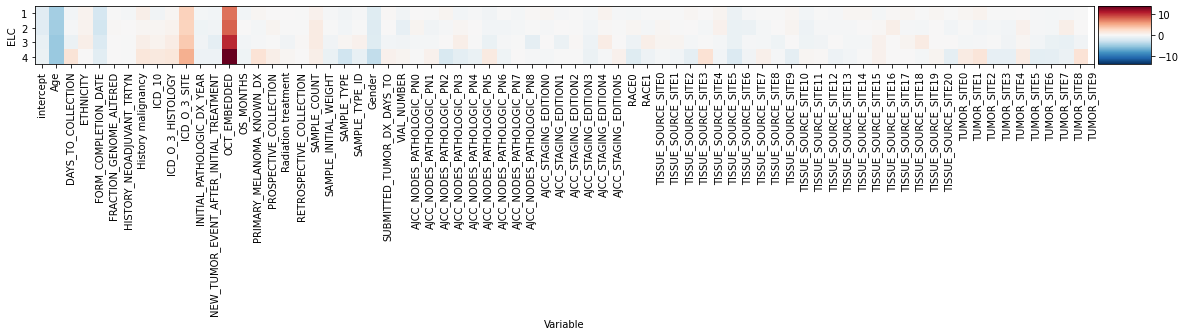

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_mosaic(MODELS, epic_id=range(4), log_trans=False, ax=ax)
plt.savefig('SKCM_heatmap.pdf')

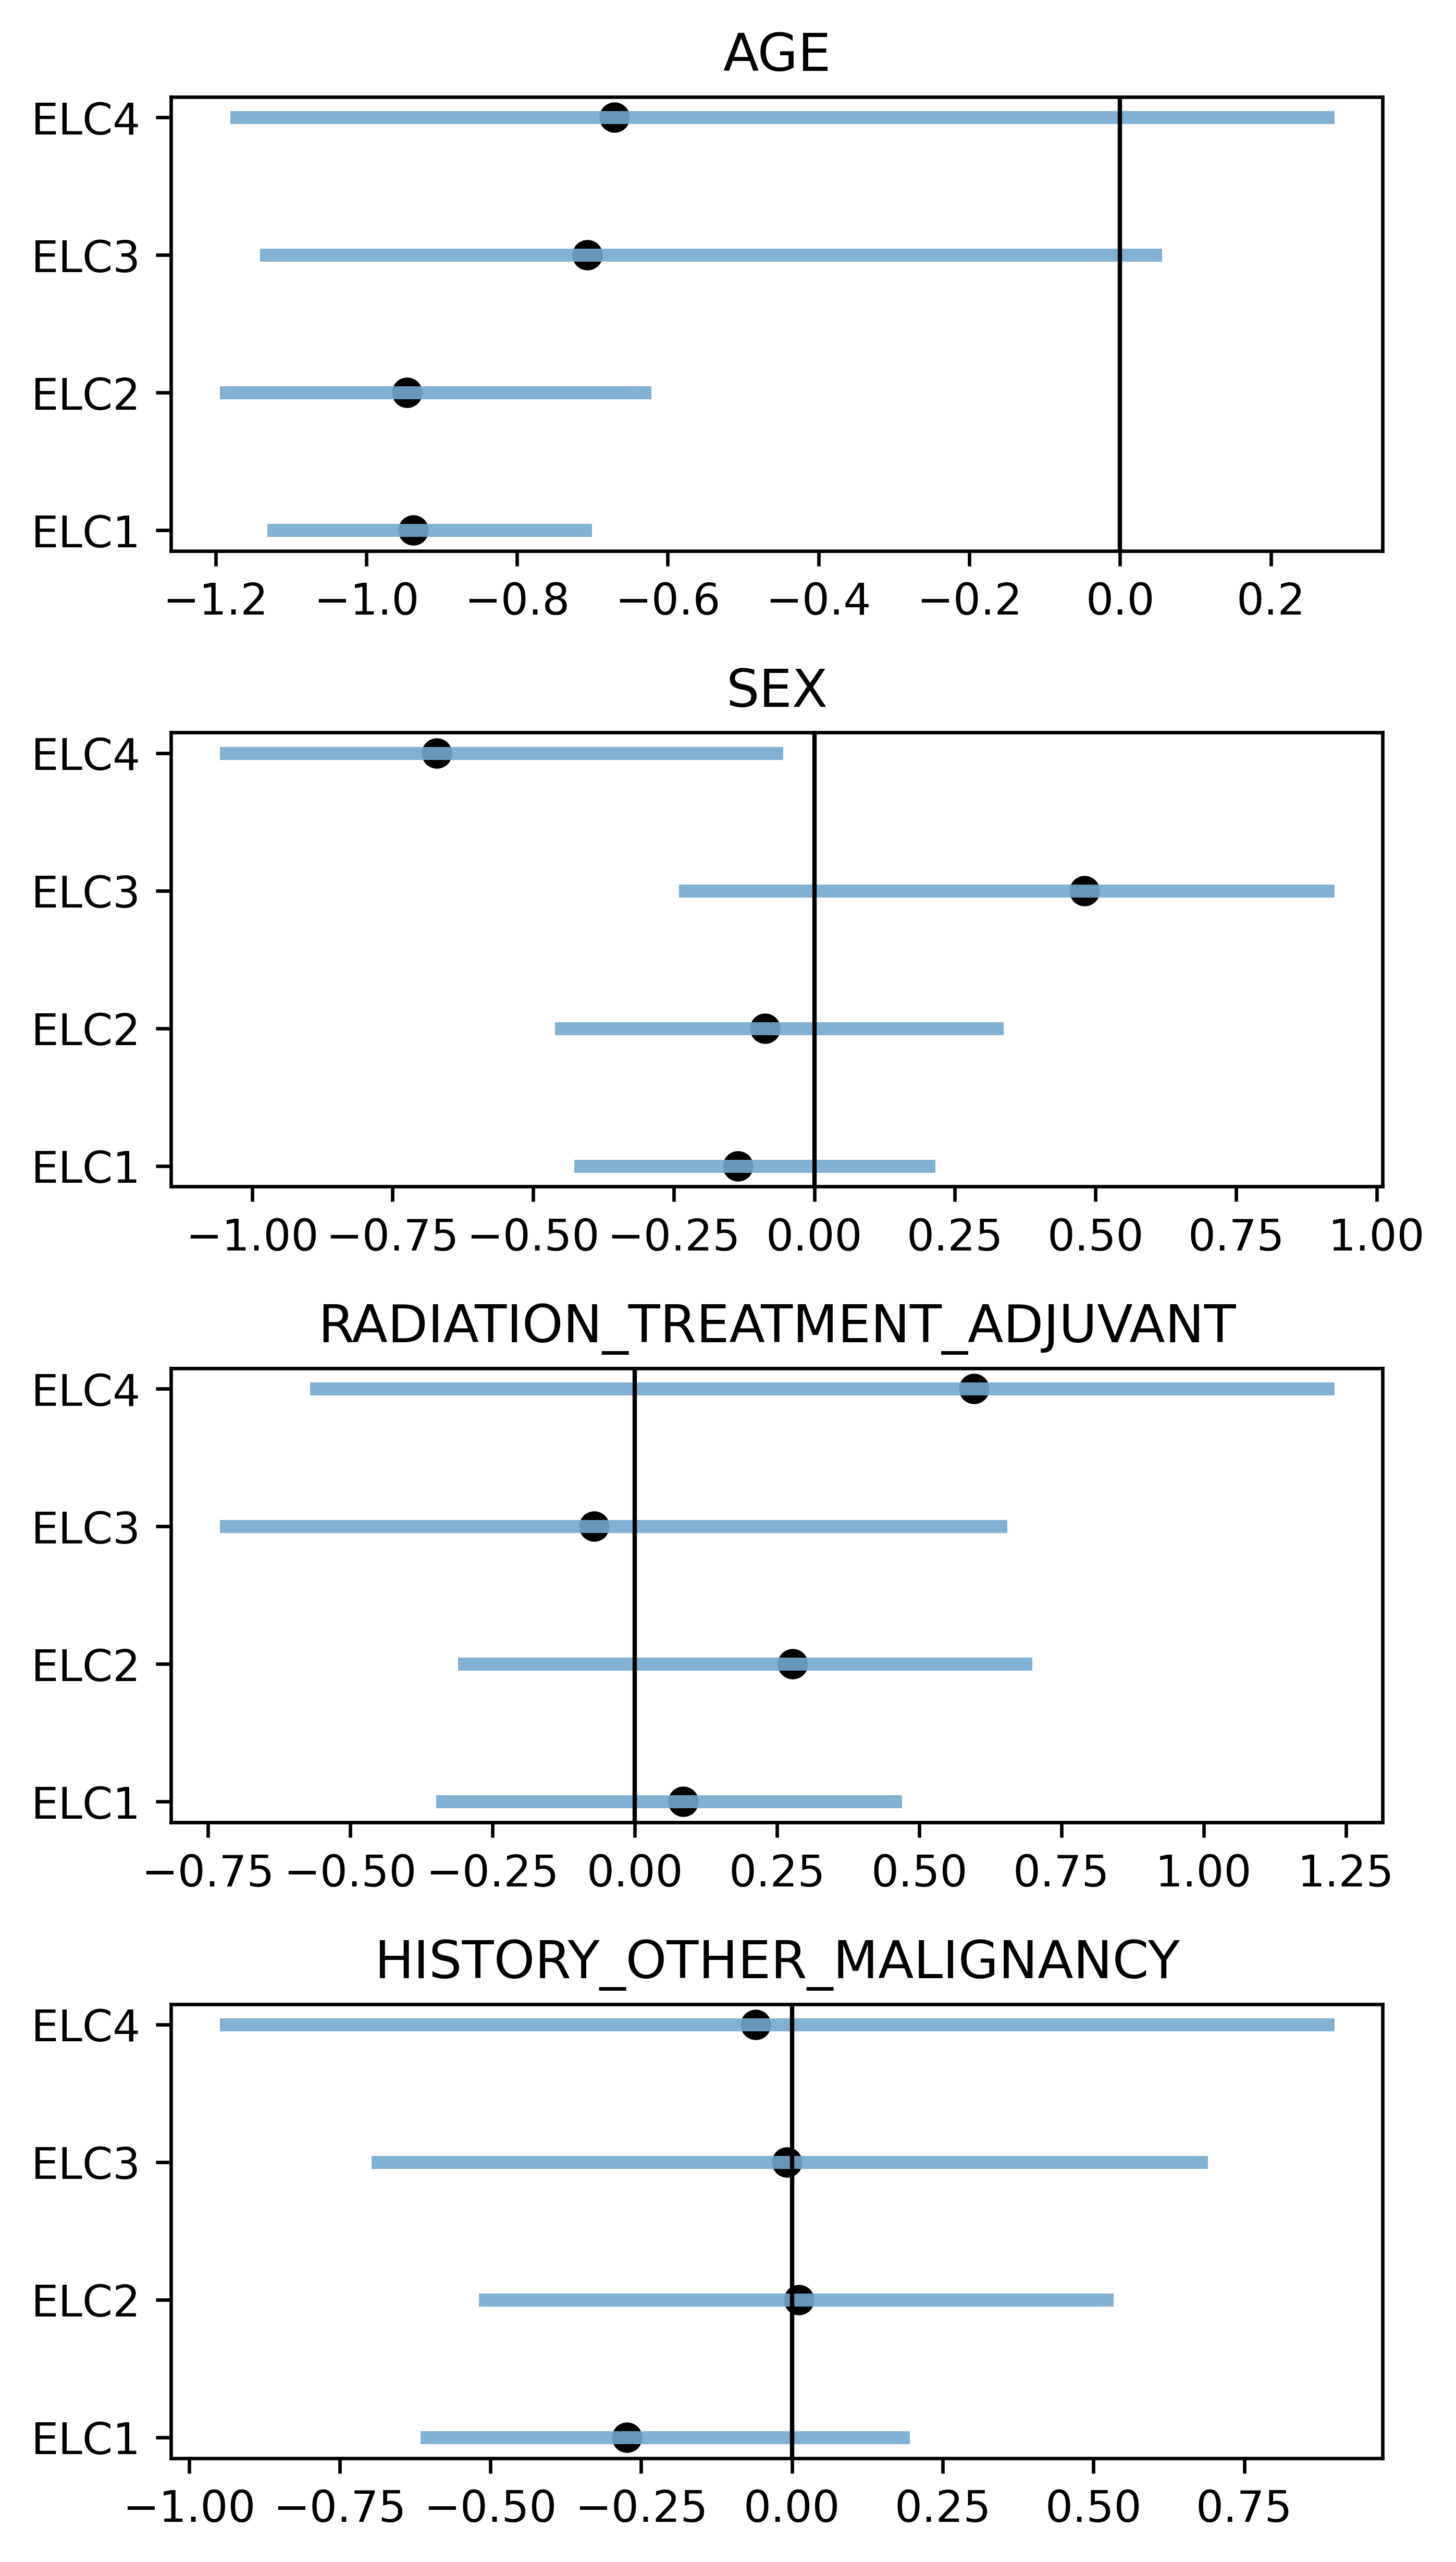

In [40]:
import string

f, axs = plt.subplots(4, 1, figsize=(5,10), dpi=600)
# f.tight_layout()
plt.subplots_adjust(hspace=0.4)
for i in range(4):
    j = (0,22,16,6)[i]
    ax = plt.subplot(4,1,i+1)
    plot_ci(MODELS,j,epic_id=range(4),ax=ax,title=True)
    
    
# f, axs = plt.subplots(2,2,figsize=(10,5),dpi=300)
# f.tight_layout()
# plt.subplots_adjust(hspace=0.3)
# for i in range(11):
#     j = (2,3,5,4)[i]
#     ax = plt.subplot(2,2,i+1)
#     plot_ci(models_top,j,epic_id=range(5),ax=ax,title=True)


### Regression Coefficients End

In [10]:
# clf_1 = RF
# clf_2 = GB
# clf_3 = MLP
# clf_4 = Forestry

In [10]:
tree.print_tree()

Feature 3 <= 0.14099194650688512
Left:
  Feature 1 <= 0.7717255248977114
  Left:
    Leaf: Accuracy = 0.7939
    Model: LogisticRegression(penalty='l1', solver='saga')
  Right:
    Leaf: Accuracy = 0.9189
    Model: LogisticRegression(penalty='l1', solver='saga')
Right:
  Feature 38 <= 0.03365618354331364
  Left:
    Leaf: Accuracy = 0.7984
    Model: LogisticRegression(penalty='l1', solver='saga')
  Right:
    Leaf: Accuracy = 0.8285
    Model: LogisticRegression(penalty='l1', solver='saga')


In [19]:
tree.tree['right']['parent']

{'feature_index': 1,
 'threshold': 0.17664530618928118,
 'left': {'feature_index': 53,
  'threshold': 0.019692314600863087,
  'left': {'leaf': True,
   'data_indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
           13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
           26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
           39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
           52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
           65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
           78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
           91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
          104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
          117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
          130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
          

In [32]:
augmented_data[best_k][25][-1]

array([ 3.67470176e-01,  1.83987479e-01,  7.68244069e-01,  7.41853130e-01,
        3.46406810e-02,  2.17383519e-01,  1.32025607e-01,  6.89027554e-01,
        2.64345428e-01,  6.99131843e-01,  6.53582280e-01,  1.10367420e+00,
        3.29246949e-01,  3.63960555e-01, -1.36792300e-03, -1.12700211e-01,
       -7.89019599e-02,  1.18726525e+00,  3.03781441e-01,  2.80657973e-01,
       -4.86788034e-01,  1.31451269e+00,  3.81882805e-01,  1.13696532e-01,
        1.84683456e-01, -2.04600655e-06, -7.06117362e-06,  1.45454255e+00,
       -4.03092645e-06, -9.84199707e-07,  9.09283469e-02,  1.06172717e-05,
        3.63623398e-01, -1.21642537e-05,  2.47462488e-06,  6.72347990e-06,
        1.91303856e-05,  1.05107220e-05, -8.61568343e-06,  2.00001220e+00,
       -8.87019427e-07,  2.00000438e+00,  1.17639480e-05,  1.81817181e+00,
        6.41473471e-06,  1.23528347e-05, -1.42980055e-07, -1.42119802e-05,
       -9.53273812e-07, -8.74276095e-06, -1.84386733e-06,  1.07917389e-05,
       -1.06524037e-05, -

In [34]:
print(best_tree.tree['left']['right']['model'].summary())

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [33]:
best_tree.print_tree()

Feature 35 <= -2.8377564766031216e-07
Left:
  Feature 5 <= 0.0493415782166494
  Left:
    Leaf: Accuracy = 0.9250
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14dcb15ba860>
  Right:
    Leaf: Accuracy = 0.9389
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14dcb15b9570>
Right:
  Feature 61 <= -2.552137048309395e-07
  Left:
    Leaf: Accuracy = 0.8985
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14dcb14c86a0>
  Right:
    Leaf: Accuracy = 0.8842
    Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14dcb413d7e0>


In [35]:
# Mixture of teachers
print(clfs[0])
print(clfs[1])
print(clfs[2])
print("Avg result:", np.mean(results))
print("Standard deviation:", np.sqrt(np.var(Results_SKCM['New test'])))
print(Results_SKCM)

RandomForestClassifier()
GradientBoostingClassifier()
MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
Avg result: 0.8280398671096346
Standard deviation: 0.018847021180888435
   New test  New train  Depth
0  0.803987   0.883661      1
1  0.836545   0.921844      1
2  0.839203   0.920470      1
3  0.807973   0.933045      1
4  0.852492   0.916056      1


In [30]:
# MLP
print(clfs[0])
print(clfs[1])
print(clfs[2])
print(Results_SKCM)
print("Avg result:", np.mean(results))
print("Standard deviation:", np.sqrt(np.var(Results_SKCM['New test'])))

MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
MLPClassifier(alpha=1e-07, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')
Avg result: 0.8176744186046512
   New test  New train  Depth
0  0.842525   0.884619      1
1  0.801329   0.935626      1
2  0.805316   0.919720      1
3  0.837209   0.912975      3
4  0.801993   0.939873      1


In [41]:
s = [0.842525, 0.801329, 0.805316, 0.837209, 0.801993]
np.sqrt(np.var(s))

0.01824807592706694

In [39]:
# Random Forest
print(clfs[0])
print(clfs[1])
print(clfs[2])
print(Results_SKCM)
print("Avg result:", np.mean(results))
print("Standard deviation:", np.sqrt(np.var(Results_SKCM['New test'])))

RandomForestClassifier()
RandomForestClassifier()
RandomForestClassifier()
   New test  New train  Depth
0  0.760133   0.829364      2
1  0.753488   0.813749      2
2  0.764784   0.811126      2
3  0.811960   0.827199      1
4  0.745515   0.834569      1
Avg result: 0.7671760797342193
Standard deviation: 0.023313076156373028


In [37]:
# Gradient Boosting
print(clfs[0])
print(clfs[1])
print(clfs[2])
print(Results_SKCM)
print("Avg result:", np.mean(results))
print("Standard deviation:", np.sqrt(np.var(Results_SKCM['New test'])))

GradientBoostingClassifier()
GradientBoostingClassifier()
GradientBoostingClassifier()
   New test  New train  Depth
0  0.697674   0.750208      3
1  0.788040   0.852348      1
2  0.778738   0.870836      2
3  0.781395   0.852224      2
4  0.806645   0.755871      3
Avg result: 0.770498338870432
Standard deviation: 0.037694042361776696


# Pruning

In [10]:
def resubstitution_error(tree, R=None):
    if R is None:
        R = []

    R.append(tree['R_node'])

    if 'leaf' in tree:
#         result = sum(R)
#         print(R)
        return tree['R_node']
    else:
        left_result = resubstitution_error(tree['left'], R)
        right_result = resubstitution_error(tree['right'], R)
    
    return sum(R)

def number_of_leaf_nodes(tree, number=None):
    if number is None:
        number = 0
    
    if 'leaf' in tree:
        number += 1
        
    else:
        left = number_of_leaf_nodes(tree['left'], number)
        right = number_of_leaf_nodes(tree['right'], number)
        return left + right

    return number

def subtrees(tree):
    if 'leaf' in tree:
        return [tree]
        
    left_subtrees = [tree['left']] + subtrees(tree['left'])
    right_subtrees = [tree['right']] + subtrees(tree['right'])

    return left_subtrees + right_subtrees

def weakest_link_pruning(tree, previous_alpha=0):
#     print('previous alpha', type(previous_alpha))
    all_subtrees = subtrees(tree)
    unique_models = set()
    unique_trees = [t for t in all_subtrees if not (t['model'] in unique_models or unique_models.add(t['model']))]
#     print(len(unique_trees))
    h = {}
    unique_subtrees = {}
    for t in unique_trees:
        if 'leaf' not in t:
            unique_subtrees[t['model']] = t
            h[t['model']] = (resubstitution_error(tree) - resubstitution_error(t))/number_of_leaf_nodes(t) - 1
    
    selected_h = []
    for model, value in h.items():
#         print('model', model, 'value', value)
        if value <= previous_alpha:
            selected_h.append((model, value))
    selected_h.append(min(h.items(), key=lambda x: x[1] if x[1] > previous_alpha else float('inf')))
    
#     print("Selected h:", selected_h)
    
    if not selected_h:
        return None
    else:
        return selected_h, {model: unique_subtrees[model] for model, _ in selected_h}
    
def cut_off_subtree(tree, target_model):
    # Base case: If the current node is None, return None
    if tree is None:
        return None

    # Check if the current node has the target model
    if tree['model'] == target_model:
#         print(tree['model'])
        tree['left'] = None
        tree['right'] = None
        tree['leaf'] = True
        return tree  # Cut off the current node
    else:
        # Recursively check the left subtree if it exists
        if 'left' in tree:
#             print('left step')
            tree['left'] = cut_off_subtree(tree['left'], target_model)

        # Recursively check the right subtree if it exists
        if 'right' in tree:
#             print('right step')
            tree['right'] = cut_off_subtree(tree['right'], target_model)

    return tree

def alpha_sequence(tree):
    alpha = [0]
    tree_sequence = []
#     for i in range(2):
    while number_of_leaf_nodes(tree.tree) > 2:
#         print('alpha', alpha[-1])
        model_to_cut = weakest_link_pruning(tree.tree, alpha[-1])[0]
        print(model_to_cut)
        print(model_to_cut[-1][1])
#         print(model_to_cut)
        for one_model_to_cut in model_to_cut:
            if one_model_to_cut is not None:
                cut_off_subtree(tree.tree, one_model_to_cut[0])
    #             print("\n Test fold result", roc_auc_score(y_test, pd.DataFrame(tree.predict(np.array(X_test), np.array(y_test)))))
    #             print("\n Test result", roc_auc_score(y, pd.DataFrame(tree.predict(np.array(X), np.array(y)))))
        tree_sequence.append(tree.copy())
        alpha.append(model_to_cut[-1][1])
    #         print(number_of_leaf_nodes(tree))
    return alpha, tree_sequence

In [13]:
ALL_RESULTS_TRAIN = []
ALL_RESULTS_TEST = []
ALL_RESULTS_VAL = []
ALL_RESULTS_LEAVES = []

for attempt in range(1):
    # random split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
    # training 4 bb models
    clf_1 = RandomForestClassifier()
    clf_1.fit(X_train, y_train)
    print('clf1 auc train:', roc_auc_score(clf_1.predict(X_train), y_train))
    print('clf1 auc test:', roc_auc_score(clf_1.predict(X_test), y_test))
    clf_2 = GradientBoostingClassifier()
    clf_2.fit(X_train, y_train)
    print('clf2 auc train:', roc_auc_score(clf_2.predict(X_train), y_train))
    print('clf2 auc test:', roc_auc_score(clf_2.predict(X_test), y_test))
    clf_3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 2), random_state=1)
    clf_3.fit(X_train, y_train)
    print('clf3 auc train:', roc_auc_score(clf_3.predict(X_train), y_train))
    print('clf3 auc test:', roc_auc_score(clf_3.predict(X_test), y_test))
    clf_4 = RandomForest()
    clf_4.fit(X_train, y_train)
    forest_preds_train = clf_4.predict(X_train)
    forest_preds = clf_4.predict(X_test)
    print("Train", roc_auc_score(y_train, forest_preds_train))
    print("Test", roc_auc_score(y_test, forest_preds))
    
    my_clfs = [clf_1, clf_2, clf_3, clf_4]
#     my_clfs = [clf_2]
    
    # best k
    
    m = 100
    min_var = np.mean(np.var(X_train, axis=0))

    def predict_mixture_of_models(X, local_models, kmeans):
        cluster_assignments = kmeans.predict(X)

        predictions = np.zeros_like(X[:, 0]) 

        for cluster, model in enumerate(local_models):
            cluster_indices = np.where(cluster_assignments == cluster)
            X_cluster = X[cluster_indices]
            predictions[cluster_indices] += model.predict(X_cluster)

        return predictions

    def evaluate_overall_model(X, y, k, clf_models, classification=False):
        kmeans = KMeans(n_clusters=k, n_init=100)
        cluster_assignments = kmeans.fit_predict(X)

        roc_score = float('-inf')

        local_models = []
        for cluster in range(k):
            cluster_indices = np.where(cluster_assignments == cluster)

            X_cluster = X[cluster_indices]
            y_cluster = y[cluster_indices]

            if len(np.unique(y_cluster)) < 2:
                clf = sorted_clf[-1][0]
    #             print("cluster:", cluster)
            else:
                for i in clf_models:
    #                 print("model in cluster:", i, "accuracy", roc_auc_score(y_cluster, i.predict(X_cluster)))
                    if roc_auc_score(y_cluster, i.predict(X_cluster)) >= roc_score:
                        roc_score = roc_auc_score(y_cluster, i.predict(X_cluster))
                        clf = i
    #                 print("best model:", clf)

            def chol_sample(mean, cov, size=1):
                cholesky_cov = np.linalg.cholesky(cov)
                random_samp = np.array([mean + cholesky_cov @ np.random.standard_normal(mean.size) for i in range(size)])
                return random_samp

            cov = np.diag(np.zeros(X_cluster.shape[1]) + 0.01)

            sample_mean = np.mean(X_cluster, axis=0)

            perturbed_samples = chol_sample(sample_mean, cov, m)

            perturbed_predictions = np.round(clf.predict(perturbed_samples))

            X_cluster = np.concatenate((X_cluster, perturbed_samples))
            y_cluster = np.concatenate((y_cluster, perturbed_predictions))
            augmented_data[k][cluster] = X_cluster
            augmented_y[k][cluster] = y_cluster
            clf_model[k][cluster] = clf

            if classification == True:
                if len(np.unique(y_cluster)) == 1:
                    model = LogisticRegression(solver='saga')
                    model.classes_ = np.unique(y_cluster)
                    model.coef_ = np.zeros((1, X.shape[1]))
                    model.intercept_ = 0.0
                else:
                    model = LogisticRegression(solver='saga')
                    model.fit(X_cluster, y_cluster)
            else:
                model = LinearRegression()
                model.fit(X_cluster, y_cluster)
            local_models.append(model)
            models_all[k][cluster] = model

        predictions = predict_mixture_of_models(X, local_models, kmeans)
        overall_score = roc_auc_score(y, predictions)

        return overall_score, augmented_data, augmented_y, models_all
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Set the maximum possible value of k
    max_k = 100

    # Iterate over different values of k and record the performance
    best_k = None
    best_score = float('-inf')  # Initialize with a very low value
    augmented_data = {}
    augmented_y = {}
    models_all = {}
    clf_model = {}

    clfs = my_clfs
#     clfs = [clf_1]

    sorted_clf = []
    for i in clfs:
        sorted_clf.append((i, roc_auc_score(np.round(i.predict(X_train)), y_train)))
    sorted_clf = sorted(sorted_clf, key=lambda x: x[1])

    for k in range(100, max_k + 1, 10):
        print("k:", k)
        augmented_data[k] = {}
        augmented_y[k] = {}
        models_all[k] = {}
        clf_model[k] ={}

        overall_score = evaluate_overall_model(X_train, y_train, k, clfs, classification=True)

        # Update best_k if a higher overall score is achieved
        if overall_score[0] > best_score:
            best_score = overall_score[0]
            best_k = k

    # Final model using the best k
    kmeans = KMeans(n_clusters=best_k, n_init=100)
    cluster_assignments = kmeans.fit_predict(X_train)

    local_models = []
    for cluster in range(best_k):
        cluster_indices = np.where(cluster_assignments == cluster)
        X_cluster = X_train[cluster_indices]
        y_cluster = y_train[cluster_indices]

    #     print("unique classes:", np.unique(y_cluster))

        if len(np.unique(y_cluster)) == 1:
            model = LogisticRegression(solver='saga')
            model.classes_ = np.unique(y_cluster)
            model.coef_ = np.zeros((1, X_train.shape[1]))
            model.intercept_ = 0.0
        else:
        #     model = LinearRegression()
            model = LogisticRegression()
            model.fit(X_cluster, y_cluster)
        local_models.append(model)

    predictions = predict_mixture_of_models(X_train, local_models, kmeans)
    print(f"Best k: {best_k}, Best AUC score: {best_score}")
    print("AUC:", roc_auc_score(y_train, predictions))
    
    # collecting results
    #With Pruning

    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold, StratifiedKFold

    results = []
    m = 100

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    n_folds = 10
    # kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=None)


    clfs = my_clfs
#     clfs = [clf_4]

    for test in range(1):
        # Set the maximum possible value of k
        max_k = best_k

        # Iterate over different values of k and record the performance
        best_k = None
        best_score = float('-inf')  # Initialize with a very low value
        augmented_data = {}
        augmented_y = {}
        models_all = {}
        clf_model = {}

        sorted_clf = []
        for i in clfs:
            sorted_clf.append((i, roc_auc_score(np.round(i.predict(X_train)), y_train)))
        sorted_clf = sorted(sorted_clf, key=lambda x: x[1])

        for k in range(max_k, max_k + 1):
            print("k:", k)
            augmented_data[k] = {}
            augmented_y[k] = {}
            models_all[k] = {}
            clf_model[k] ={}

            overall_score = evaluate_overall_model(X_train, y_train, k, clfs, classification=True)

            # Update best_k if a higher overall score is achieved
            if overall_score[0] > best_score:
                best_score = overall_score[0]
                best_k = k

        local_models = []
        for cluster in range(best_k):
            cluster_indices = np.where(cluster_assignments == cluster)
            X_cluster = X_train[cluster_indices]
            y_cluster = y_train[cluster_indices]

        #     print("unique classes:", np.unique(y_cluster))

            if len(np.unique(y_cluster)) == 1:
                model = LogisticRegression(solver='saga')
                model.classes_ = np.unique(y_cluster)
                model.coef_ = np.zeros((1, X_train.shape[1]))
                model.intercept_ = 0.0
            else:
            #     model = LinearRegression()
                model = LogisticRegression()
                model.fit(X_cluster, y_cluster)
            local_models.append(model)

        predictions = predict_mixture_of_models(X_train, local_models, kmeans)

        import statistics

        dist = pd.DataFrame(dist_matrix(best_k, classification=True))

        CELL_centers = []
        CELL_variances = []
        for i in augmented_data[best_k]:
            CELL_variances.append(np.sqrt(np.var(augmented_data[best_k][i], axis=0)))
            CELL_centers.append(np.mean(augmented_data[best_k][i], axis=0))
        cells_df = pd.DataFrame(CELL_centers)

        y_local = []
        for i in range(len(CELL_centers)):
            y_local.append(statistics.mode(augmented_y[best_k][i]))


        # import DT_with_R2_stopping as dtc
        import PRUNING as dtc

        for k in range(1, 2):
            roc_curr = float('-inf')
            roc_curr_train = float('-inf')
            best_depth = float('inf')

            tree = dtc.DistanceDecisionTree(max_depth=float('inf'), classification=True)

            tree.fit(np.array(cells_df), np.array(dist))

            data_transformed = [augmented_data[best_k][key] for key in range(len(augmented_data[best_k]))]
            data_transformed_y = [augmented_y[best_k][key] for key in range(len(augmented_y[best_k]))]

            X_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed] for item in sublist])
            y_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed_y] for item in sublist])

            print("Max Depth", tree.final_depth)

            tree.fit_leaf_logistic_models(X_transformed, y_transformed)
            alpha_sequence_full = alpha_sequence(tree)[1]
            alpha_sequence_full_end = alpha_sequence_full.copy()

            cv_scores = {}
            test_score = {}
            train_score = {}

    #         fold_data = {}
    #         fold_data_val = {}
    #         fold_y = {}
    #         fold_y_val = {}

            for sequence_tree in alpha_sequence_full:

                fold_data = {}
                fold_data_val = {}
                fold_y = {}
                fold_y_val = {}

                fold_scores = []
                fold_test = []
                fold_train = []

    #             fold_data = []
    #             fold_data_val = []
    #             fold_y = []
    #             fold_y_val = []

    #             data_transformed = [augmented_data[best_k][key] for key in range(len(augmented_data[best_k]))]
    #             data_transformed_y = [augmented_y[best_k][key] for key in range(len(augmented_y[best_k]))]

    #             X_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed] for item in sublist])
    #             y_transformed = np.array([item for sublist in [arr.tolist() for arr in data_transformed_y] for item in sublist])

                for cluster in augmented_data[best_k].keys():
                    for fold, (train_indices, val_indices) in enumerate(stratified_kfold.split(augmented_data[best_k][cluster], augmented_y[best_k][cluster])):
                        if fold in fold_data:
                            fold_data[fold] = np.concatenate([fold_data[fold], augmented_data[best_k][cluster][train_indices]])
                            fold_data_val[fold] = np.concatenate([fold_data_val[fold], augmented_data[best_k][cluster][val_indices]])
                            fold_y[fold] = np.concatenate([fold_y[fold], augmented_y[best_k][cluster][train_indices]])
                            fold_y_val[fold] = np.concatenate([fold_y_val[fold], augmented_y[best_k][cluster][val_indices]])
                        else:
                            fold_data[fold] = augmented_data[best_k][cluster][train_indices]
                            fold_data_val[fold] = augmented_data[best_k][cluster][val_indices]
                            fold_y[fold] = augmented_y[best_k][cluster][train_indices]
                            fold_y_val[fold] = augmented_y[best_k][cluster][val_indices]

                for p in range(n_folds):

                    X_train_fold, X_val = fold_data[p], fold_data_val[p]
                    y_train_fold, y_val = fold_y[p], fold_y_val[p]

    #                 print("X_train_fold", X_train_fold)
    #                 print("y_train_fold", y_train_fold)

    #                 tree = dtc.DistanceDecisionTree(max_depth=i, classification=True)

    #                 tree.fit(np.array(cells_df), np.array(dist))

    #                 print("y: ", y_train_fold)
    #                 tree.fit_leaf_logistic_models_cluster_based(np.array(y_train_fold), np.array(cells_df), np.array(X_train_fold), 0.2)
                    sequence_tree.fit_leaf_logistic_models(X_train_fold, y_train_fold)

    #                 print("Results:", alpha_sequence(tree))

                    Y_pred_train = sequence_tree.predict(X_train_fold, y_train_fold)
                    Y_pred = sequence_tree.predict(X_val, y_val)
    #                 print(Y_pred)
    #                 if Y_pred is not None:
    #                 Y_pred = [a[0] for a in Y_pred]
                    [print("None") for a in Y_pred if a is None]
                    Y_pred = [a[0] if a is not None else 0 for a in Y_pred]
    #                 print(Y_pred)

#                     print("Current Accuracy val", roc_auc_score(y_val, Y_pred))


                    fold_accuracy = roc_auc_score(y_val, Y_pred)

                    fold_scores.append(fold_accuracy)
                    fold_train.append(roc_auc_score(y_train, sequence_tree.predict(X_train, y_train)))
                    fold_test.append(roc_auc_score(y_test, sequence_tree.predict(X_test, y_test)))

                cv_scores[sequence_tree] = np.mean(fold_scores)
                test_score[sequence_tree] = np.mean(fold_test)
                train_score[sequence_tree] = np.mean(fold_train)

            print("Test scores:", test_score)
            print("cv_scores:", cv_scores)

        best_depth = max(cv_scores, key=lambda k: cv_scores[k])
        best_tree_object = next((obj for obj in alpha_sequence_full_end if obj == best_depth), None)
        best_tree_object.fit_leaf_logistic_models(X_transformed, y_transformed)
        
        Y_pred_train = best_tree_object.predict(X_transformed, y_transformed)
        Y_pred_train = [a[0] if type(a[0])==np.float64 else a[0][0] for a in Y_pred_train]
        Y_pred_test = best_tree_object.predict(X_test, y_test)
        Y_pred_test = [a[0] if type(a[0])==np.float64 else a[0][0] for a in Y_pred_test]
        
        print("\nFinal result whole training data:", roc_auc_score(y_transformed, Y_pred_train), "Final result whole test data:",
              roc_auc_score(y_test, Y_pred_test))
        
        print("Best Depth:", best_depth, "Train:", train_score[best_depth], 
              "Test:", test_score[best_depth], "Val:", cv_scores[best_depth])  
        print("Models", clfs)
    
#     ALL_RESULTS_TRAIN.append(train_score[best_depth])
#     ALL_RESULTS_TEST.append(test_score[best_depth])
#     ALL_RESULTS_VAL.append(cv_scores[best_depth])
    ALL_RESULTS_TRAIN.append(roc_auc_score(y_transformed, Y_pred_train))
    ALL_RESULTS_TEST.append(roc_auc_score(y_test, Y_pred_test))
#     ALL_RESULTS_VAL.append(cv_scores[best_depth])

clf1 auc train: 1.0
clf1 auc test: 0.6677807486631018
clf2 auc train: 0.9935483870967742
clf2 auc test: 0.7821357943309163
clf3 auc train: 0.9936305732484076
clf3 auc test: 0.7754010695187166


x does not have column names.  The check that columns are provided in the same order when training and predicting will be skipped


Train 1.0
Test 0.7986842105263158
k: 100


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

Best k: 100, Best AUC score: 0.8806451612903226
AUC: 0.8935483870967742
k: 100


/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/storage/home/eak5582/.local/lib/py

Max Depth 9
Iteration limit reached    (Exit mode 9)
            Current function value: 0.3457309165014807
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 32 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24801415681363692
            Iterations: 824
            Function evaluations: 825
            Gradient evaluations: 824


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 22 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.250528071041181
            Iterations: 691
            Function evaluations: 692
            Gradient evaluations: 691


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20482910329396403
            Iterations: 609
            Function evaluations: 609
            Gradient evaluations: 609


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0428317108200096
            Iterations: 571
            Function evaluations: 572
            Gradient evaluations: 571
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04606490761046171
            Iterations: 547
            Function evaluations: 548
            Gradient evaluations: 547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2521694924855512
            Iterations: 538
            Function evaluations: 539
            Gradient evaluations: 538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21813123083926755
            Iterations: 487
            Function evaluations: 487
            Gradient evaluations: 487
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1746687302776342
            Iterations: 587
         

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19233809292118917
            Iterations: 610
            Function evaluations: 610
            Gradient evaluations: 610
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12620955339865572
            Iterations: 577
            Function evaluations: 578
            Gradient evaluations: 577
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12987122999411235
            Iterations: 540
            Function evaluations: 540
            Gradient evaluations: 540
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13104691034912674
            Iterations: 532
            Function evaluations: 532
            Gradient evaluations: 532
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14609075986003206
            Iterations: 447
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35305322570721026
            Iterations: 846
            Function evaluations: 846
            Gradient evaluations: 846


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34839163459119316
            Iterations: 663
            Function evaluations: 663
            Gradient evaluations: 663


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.31741544603015426
            Iterations: 562
            Function evaluations: 563
            Gradient evaluations: 562
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27892313584542777
            Iterations: 532
            Function evaluations: 532
            Gradient evaluations: 532
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24040612398446148
            Iterations: 503
            Function evaluations: 504
            Gradient evaluations: 503
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20519952754864995
            Iterations: 511
            Function evaluations: 511
            Gradient evaluations: 511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21599033473353996
            Iterations: 392
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27579192001788244
            Iterations: 466
            Function evaluations: 467
            Gradient evaluations: 466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29832892165434843
            Iterations: 455
            Function evaluations: 456
            Gradient evaluations: 455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3426063396842468
            Iterations: 748
            Function evaluations: 748
            Gradient evaluations: 748


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3432027299558256
            Iterations: 550
            Function evaluations: 550
            Gradient evaluations: 550
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2626652367435371
            Iterations: 533
            Function evaluations: 534
            Gradient evaluations: 533


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18217433087754267
            Iterations: 584
            Function evaluations: 584
            Gradient evaluations: 584
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18755945997911955
            Iterations: 505
            Function evaluations: 505
            Gradient evaluations: 505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17446293461940937
            Iterations: 457
            Function evaluations: 457
            Gradient evaluations: 457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2275712139195692
            Iterations: 268
            Function evaluations: 269
            Gradient evaluations: 268
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1960582607324482
            Iterations: 451
        

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1946973368829374
            Iterations: 525
            Function evaluations: 525
            Gradient evaluations: 525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1140358952146655
            Iterations: 440
            Function evaluations: 440
            Gradient evaluations: 440
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2108222511441295
            Iterations: 325
            Function evaluations: 326
            Gradient evaluations: 325
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2342615097926005
            Iterations: 456
            Function evaluations: 457
            Gradient evaluations: 456
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2959812267301243
            Iterations: 604
           

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28339562931456574
            Iterations: 512
            Function evaluations: 512
            Gradient evaluations: 512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2841151992460961
            Iterations: 429
            Function evaluations: 429
            Gradient evaluations: 429
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29588495052202274
            Iterations: 466
            Function evaluations: 466
            Gradient evaluations: 466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20489538822927933
            Iterations: 458
            Function evaluations: 458
            Gradient evaluations: 458
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23626122731904214
            Iterations: 510
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34771898704638116
            Iterations: 537
            Function evaluations: 537
            Gradient evaluations: 537
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3167172756431896
            Iterations: 468
            Function evaluations: 469
            Gradient evaluations: 468
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2367576468329265
            Iterations: 506
            Function evaluations: 506
            Gradient evaluations: 506
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24030649067939885
            Iterations: 357
            Function evaluations: 357
            Gradient evaluations: 357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21228140633035192
            Iterations: 181
        

/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members,

Iteration limit reached    (Exit mode 9)
            Current function value: 0.34621156545941034
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 34 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24968693504293457
            Iterations: 816
            Function evaluations: 816
            Gradient evaluations: 816


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24895787810462996
            Iterations: 667
            Function evaluations: 667
            Gradient evaluations: 667


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2017134397151566
            Iterations: 600
            Function evaluations: 600
            Gradient evaluations: 600


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03701144473942953
            Iterations: 529
            Function evaluations: 529
            Gradient evaluations: 529
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03997443898258962
            Iterations: 513
            Function evaluations: 514
            Gradient evaluations: 513
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24909973909182734
            Iterations: 533
            Function evaluations: 534
            Gradient evaluations: 533
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22300803327000623
            Iterations: 481
            Function evaluations: 481
            Gradient evaluations: 481
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17915204089023717
            Iterations: 510
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19601753351713289
            Iterations: 639
            Function evaluations: 639
            Gradient evaluations: 639
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1313664966259432
            Iterations: 518
            Function evaluations: 518
            Gradient evaluations: 518
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1397518902056798
            Iterations: 501
            Function evaluations: 502
            Gradient evaluations: 501
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1412078419236037
            Iterations: 515
            Function evaluations: 515
            Gradient evaluations: 515
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15716752186926444
            Iterations: 380
         

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34386955023873733
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 39 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24772060294017417
            Iterations: 822
            Function evaluations: 823
            Gradient evaluations: 822


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2531882292738131
            Iterations: 667
            Function evaluations: 667
            Gradient evaluations: 667


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21074322861529168
            Iterations: 556
            Function evaluations: 556
            Gradient evaluations: 556
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04457350140752317
            Iterations: 595
            Function evaluations: 595
            Gradient evaluations: 595
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04743622304388583
            Iterations: 582
            Function evaluations: 582
            Gradient evaluations: 582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25250694561733245
            Iterations: 538
            Function evaluations: 538
            Gradient evaluations: 538
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22053928003690906
            Iterations: 492
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18128411709521758
            Iterations: 632
            Function evaluations: 633
            Gradient evaluations: 632
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12327038236156401
            Iterations: 586
            Function evaluations: 586
            Gradient evaluations: 586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1327532631830769
            Iterations: 530
            Function evaluations: 530
            Gradient evaluations: 530
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13420320955936882
            Iterations: 524
            Function evaluations: 525
            Gradient evaluations: 524
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13265341756351184
            Iterations: 359
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 14 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3470487418139503
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 34 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2499961630784015
            Iterations: 833
            Function evaluations: 834
            Gradient evaluations: 833


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25018140716797777
            Iterations: 680
            Function evaluations: 680
            Gradient evaluations: 680


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19555935634049104
            Iterations: 622
            Function evaluations: 622
            Gradient evaluations: 622
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0447838520281157
            Iterations: 593
            Function evaluations: 593
            Gradient evaluations: 593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04802643986518185
            Iterations: 582
            Function evaluations: 582
            Gradient evaluations: 582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2384159259446283
            Iterations: 547
            Function evaluations: 547
            Gradient evaluations: 547
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18548101305313897
            Iterations: 564
        

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1972432910981511
            Iterations: 593
            Function evaluations: 594
            Gradient evaluations: 593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12880957081761646
            Iterations: 609
            Function evaluations: 609
            Gradient evaluations: 609
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13164220125805728
            Iterations: 573
            Function evaluations: 574
            Gradient evaluations: 573
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13237153039500077
            Iterations: 573
            Function evaluations: 573
            Gradient evaluations: 573
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15722996043500392
            Iterations: 440
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 16 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3450789217774115
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 33 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24841998038543606
            Iterations: 832
            Function evaluations: 832
            Gradient evaluations: 832


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25312434619232654
            Iterations: 665
            Function evaluations: 665
            Gradient evaluations: 665


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20650500118273316
            Iterations: 621
            Function evaluations: 622
            Gradient evaluations: 621
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04691514642113082
            Iterations: 560
            Function evaluations: 561
            Gradient evaluations: 560
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05052921795991723
            Iterations: 563
            Function evaluations: 564
            Gradient evaluations: 563
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24791791347338804
            Iterations: 525
            Function evaluations: 525
            Gradient evaluations: 525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21941170168653967
            Iterations: 519
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19054020362433072
            Iterations: 624
            Function evaluations: 625
            Gradient evaluations: 624
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12392864359635586
            Iterations: 623
            Function evaluations: 623
            Gradient evaluations: 623
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1357765387316309
            Iterations: 558
            Function evaluations: 558
            Gradient evaluations: 558
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13722207722456634
            Iterations: 553
            Function evaluations: 554
            Gradient evaluations: 553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14924003173754388
            Iterations: 422
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34681589515361166
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 42 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24480291312585978
            Iterations: 831
            Function evaluations: 831
            Gradient evaluations: 831


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23988381722519778
            Iterations: 667
            Function evaluations: 668
            Gradient evaluations: 667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18846502780234964
            Iterations: 623
            Function evaluations: 623
            Gradient evaluations: 623
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.046561524963857064
            Iterations: 593
            Function evaluations: 593
            Gradient evaluations: 593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05015655646725956
            Iterations: 560
            Function evaluations: 560
            Gradient evaluations: 560
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23935327022412103
            Iterations: 530
     

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17287768548898574
            Iterations: 602
            Function evaluations: 603
            Gradient evaluations: 602
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15566309656284089
            Iterations: 534
            Function evaluations: 534
            Gradient evaluations: 534
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15864875447458557
            Iterations: 562
            Function evaluations: 562
            Gradient evaluations: 562
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14300287428166938
            Iterations: 406
            Function evaluations: 407
            Gradient evaluations: 406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1660040992712854
            Iterations: 554
       

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23490687208568983
            Iterations: 433
            Function evaluations: 433
            Gradient evaluations: 433
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23564054442583865
            Iterations: 384
            Function evaluations: 384
            Gradient evaluations: 384
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2008175283941841
            Iterations: 502
            Function evaluations: 502
            Gradient evaluations: 502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.175233888473026
            Iterations: 537
            Function evaluations: 538
            Gradient evaluations: 537
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3745175568838421
            Iterations: 927
          

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3460209257998608
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 37 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24578320963240222
            Iterations: 847
            Function evaluations: 847
            Gradient evaluations: 847


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24626522830316525
            Iterations: 715
            Function evaluations: 715
            Gradient evaluations: 715
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20348785930788818
            Iterations: 594
            Function evaluations: 594
            Gradient evaluations: 594
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03802809613129276
            Iterations: 629
            Function evaluations: 629
            Gradient evaluations: 629
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04033883427053275
            Iterations: 598
            Function evaluations: 599
            Gradient evaluations: 598
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2533748463007168
            Iterations: 509
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18687279943487048
            Iterations: 620
            Function evaluations: 620
            Gradient evaluations: 620
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13161502086419927
            Iterations: 591
            Function evaluations: 591
            Gradient evaluations: 591
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1341872829367809
            Iterations: 564
            Function evaluations: 564
            Gradient evaluations: 564
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1355374255235969
            Iterations: 545
            Function evaluations: 545
            Gradient evaluations: 545
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15473951983627904
            Iterations: 455
        

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34563678061886477
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24743717411558722
            Iterations: 850
            Function evaluations: 850
            Gradient evaluations: 850


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2483750401167791
            Iterations: 687
            Function evaluations: 687
            Gradient evaluations: 687


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19587095518518408
            Iterations: 649
            Function evaluations: 649
            Gradient evaluations: 649
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04475180312751818
            Iterations: 578
            Function evaluations: 578
            Gradient evaluations: 578
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04818590284663307
            Iterations: 542
            Function evaluations: 543
            Gradient evaluations: 542
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2458307041100389
            Iterations: 536
            Function evaluations: 537
            Gradient evaluations: 536
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20940799464208348
            Iterations: 554
       

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13542451893655316
            Iterations: 396
            Function evaluations: 396
            Gradient evaluations: 396
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15958728353928534
            Iterations: 609
            Function evaluations: 609
            Gradient evaluations: 609
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1120296231500823
            Iterations: 383
            Function evaluations: 383
            Gradient evaluations: 383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11638323663699612
            Iterations: 358
            Function evaluations: 359
            Gradient evaluations: 358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13261745762325633
            Iterations: 165
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34425516050580157
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 40 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2462737159238545
            Iterations: 811
            Function evaluations: 811
            Gradient evaluations: 811


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 8 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24941919317922384
            Iterations: 689
            Function evaluations: 689
            Gradient evaluations: 689


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20353636788413537
            Iterations: 597
            Function evaluations: 598
            Gradient evaluations: 597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03992085604820312
            Iterations: 601
            Function evaluations: 601
            Gradient evaluations: 601
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04302950411462227
            Iterations: 626
            Function evaluations: 626
            Gradient evaluations: 626
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25013976859233017
            Iterations: 527
            Function evaluations: 528
            Gradient evaluations: 527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21660317094436338
            Iterations: 482
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19032644376764973
            Iterations: 611
            Function evaluations: 611
            Gradient evaluations: 611
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12936834525954322
            Iterations: 561
            Function evaluations: 562
            Gradient evaluations: 561
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13632288804648224
            Iterations: 517
            Function evaluations: 517
            Gradient evaluations: 517
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13688556492643902
            Iterations: 525
            Function evaluations: 525
            Gradient evaluations: 525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12926335866857966
            Iterations: 408
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3460141370281328
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 31 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24951599237047695
            Iterations: 811
            Function evaluations: 811
            Gradient evaluations: 811


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 13 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25326894960841295
            Iterations: 672
            Function evaluations: 672
            Gradient evaluations: 672
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20437276258809361
            Iterations: 593
            Function evaluations: 594
            Gradient evaluations: 593


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.040779924743033866
            Iterations: 584
            Function evaluations: 585
            Gradient evaluations: 584
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.043757033020070175
            Iterations: 567
            Function evaluations: 567
            Gradient evaluations: 567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25920738725915543
            Iterations: 506
            Function evaluations: 507
            Gradient evaluations: 506
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22631845381874893
            Iterations: 488
            Function evaluations: 488
            Gradient evaluations: 488
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18296673607197056
            Iterations: 568
    

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17508020881969005
            Iterations: 579
            Function evaluations: 579
            Gradient evaluations: 579
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13633811254954287
            Iterations: 480
            Function evaluations: 481
            Gradient evaluations: 480
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16820433181353062
            Iterations: 573
            Function evaluations: 573
            Gradient evaluations: 573
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18132275295803724
            Iterations: 463
            Function evaluations: 464
            Gradient evaluations: 463
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1617789694221054
            Iterations: 556
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19313191530414583
            Iterations: 620
            Function evaluations: 621
            Gradient evaluations: 620
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12386654255435794
            Iterations: 542
            Function evaluations: 543
            Gradient evaluations: 542
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12883249851691636
            Iterations: 543
            Function evaluations: 544
            Gradient evaluations: 543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12999226279387105
            Iterations: 566
            Function evaluations: 566
            Gradient evaluations: 566
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15673189388460174
            Iterations: 481
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34448319573748715
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 32 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24394511561966548
            Iterations: 856
            Function evaluations: 856
            Gradient evaluations: 856


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24673123789651372
            Iterations: 664
            Function evaluations: 664
            Gradient evaluations: 664


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 6 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20747078246395445
            Iterations: 586
            Function evaluations: 586
            Gradient evaluations: 586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04727653025824971
            Iterations: 575
            Function evaluations: 575
            Gradient evaluations: 575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05062655278348556
            Iterations: 549
            Function evaluations: 550
            Gradient evaluations: 549
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24807168743179517
            Iterations: 522
            Function evaluations: 523
            Gradient evaluations: 522
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22224419694101483
            Iterations: 504
      

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1940060627744666
            Iterations: 607
            Function evaluations: 607
            Gradient evaluations: 607
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12377518969294088
            Iterations: 550
            Function evaluations: 551
            Gradient evaluations: 550
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12675918926668514
            Iterations: 509
            Function evaluations: 509
            Gradient evaluations: 509
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12787875128488652
            Iterations: 527
            Function evaluations: 528
            Gradient evaluations: 527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14389796673406652
            Iterations: 398
       

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 20 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/storage/home/eak5582/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(

Iteration limit reached    (Exit mode 9)
            Current function value: 0.3470193541205792
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 38 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24695215281032604
            Iterations: 824
            Function evaluations: 824
            Gradient evaluations: 824


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 5 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3751436024476856
            Iterations: 930
            Function evaluations: 930
            Gradient evaluations: 930


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34486921118246455
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 30 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24772917744453768
            Iterations: 832
            Function evaluations: 832
            Gradient evaluations: 832


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3737674274630739
            Iterations: 934
            Function evaluations: 935
            Gradient evaluations: 934


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 19 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34357459847165295
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 34 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24701012867469302
            Iterations: 831
            Function evaluations: 831
            Gradient evaluations: 831


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 12 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3714536351871702
            Iterations: 900
            Function evaluations: 900
            Gradient evaluations: 900


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34818962379104906
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 33 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24607949025756964
            Iterations: 833
            Function evaluations: 833
            Gradient evaluations: 833


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 9 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37647223824755416
            Iterations: 907
            Function evaluations: 908
            Gradient evaluations: 907


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 21 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3483061216568116
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 38 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24723381680174064
            Iterations: 869
            Function evaluations: 869
            Gradient evaluations: 869


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 13 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37772350606226335
            Iterations: 939
            Function evaluations: 939
            Gradient evaluations: 939


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 16 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34463305083844337
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 44 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2480717101897493
            Iterations: 823
            Function evaluations: 823
            Gradient evaluations: 823


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3731460480113197
            Iterations: 931
            Function evaluations: 932
            Gradient evaluations: 931


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 17 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34420993066017885
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 41 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24776887138773843
            Iterations: 830
            Function evaluations: 830
            Gradient evaluations: 830


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37268055627373803
            Iterations: 910
            Function evaluations: 911
            Gradient evaluations: 910


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34484563091883114
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 33 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24709822801212125
            Iterations: 835
            Function evaluations: 836
            Gradient evaluations: 835


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3733131043110764
            Iterations: 917
            Function evaluations: 917
            Gradient evaluations: 917


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 24 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3423973437089993
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 38 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2436902062040401
            Iterations: 845
            Function evaluations: 845
            Gradient evaluations: 845


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3684704294219454
            Iterations: 934
            Function evaluations: 934
            Gradient evaluations: 934


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 16 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.34730076479059796
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 37 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25159472336132166
            Iterations: 825
            Function evaluations: 825
            Gradient evaluations: 825


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3736655379313934
            Iterations: 913
            Function evaluations: 913
            Gradient evaluations: 913
Test scores: {<PRUNING.DistanceDecisionTree object at 0x14e4f5e1f700>: 0.7934210526315788, <PRUNING.DistanceDecisionTree object at 0x14e4f5e1d9c0>: 0.8261184210526314}
cv_scores: {<PRUNING.DistanceDecisionTree object at 0x14e4f5e1f700>: 0.9038846679839937, <PRUNING.DistanceDecisionTree object at 0x14e4f5e1d9c0>: 0.9291041542320417}


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Iteration limit reached    (Exit mode 9)
            Current function value: 0.3457309165014807
            Iterations: 1000
            Function evaluations: 1000
            Gradient evaluations: 1000


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 32 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24801415681363692
            Iterations: 824
            Function evaluations: 825
            Gradient evaluations: 824


/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 22 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37401111757169087
            Iterations: 955
            Function evaluations: 955
            Gradient evaluations: 955

Final result whole training data: 0.9349593686009972 Final result whole test data: 0.8269736842105264
Best Depth: <PRUNING.DistanceDecisionTree object at 0x14e4f5e1d9c0> Train: 0.9296357960457856 Test: 0.8261184210526314 Val: 0.9291041542320417
Models 

/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 18 out of 73 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/storage/home/eak5582/.local/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


[RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 2), random_state=1,
              solver='lbfgs'), RandomForest(ntree=500, replace=True, sampsize=310, sample_fraction=None, mtry=24, nodesize_spl=5, nodesize_avg=5, nodesize_strict_spl=1, nodesize_strict_avg=1, min_split_gain=0.0, max_depth=156, interaction_depth=156, splitratio=1.0, oob_honest=False, double_bootstrap=False, seed=251, verbose=False, nthread=0, splitrule='variance', middle_split=False, max_obs=310, linear=False, min_trees_per_fold=0, fold_size=1, monotone_avg=False, overfit_penalty=1, scale=False, double_tree=False, na_direction=False, forest=<capsule object NULL at 0x14e4dec99dd0>, dataframe=<capsule object NULL at 0x14e4dec99d10>, processed_dta=ProcessedDta(processed_x=           0         1    2         3         4    5    6         7   \
0    0.826667  0.209269  1.0  0.689320  0.742586  0.0  0.0  0.657895   
1    0.773333  0.012860  1.0  0.660194  0.256570  0

In [17]:
number_of_leaf_nodes(best_tree_object.tree)

2

In [14]:
best_tree_object.print_tree()

Feature 10 <= 0.7835065767614282Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14e4e0aace80> R_node: 1613
Left:
  Leaf: Accuracy Test= 0.8988
  Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14e4e0aae680>   R_node: 400
Right:
  Leaf: Accuracy Test= 0.8273
  Model: <statsmodels.discrete.discrete_model.L1BinaryResultsWrapper object at 0x14e4e0aae890>   R_node: 1098


In [14]:
alpha_sequence_full

In [24]:
np.std([ALL_RESULTS_TEST])

0.04807292603937304

In [29]:
# alpha_sequence_full[0].print_tree()
number_of_leaf_nodes(alpha_sequence_full[0].tree)

37

In [14]:
# Mixture
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)
print("\nValid:", ALL_RESULTS_VAL)


Train: [0.9331209129909617, 0.9112558100582053, 0.9226148851148853, 0.9239456635318704, 0.8897768897768898]

Test: [0.8289021164021164, 0.7484285714285714, 0.7566732412886259, 0.8413194444444445, 0.8956493078444299]

Valid: [0.8827901518172968, 0.9027239835439002, 0.9282141407666952, 0.9142747883045503, 0.8894094241720495]


In [19]:
# RF
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)
print("\nValid:", ALL_RESULTS_VAL)


Train: [0.8850630698139129, 0.8749385647049023, 0.8847166666666666, 0.8578785229590775, 0.8948019492690241]

Test: [0.7992105263157895, 0.9179144385026741, 0.7619269102990033, 0.8341931216931217, 0.802807486631016]

Valid: [0.9363756737499838, 0.9314190536669671, 0.927557225030726, 0.9318706696829209, 0.9349257521091798]


In [13]:
# GB
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)
print("\nValid:", ALL_RESULTS_VAL)


Train: [0.9371543970686209, 0.8698010323010325, 0.8555472295075143, 0.8930777555777556, 0.91018368111958]

Test: [0.7589980224126565, 0.8619986850756082, 0.808994708994709, 0.7750821827744904, 0.8669312169312169]

Valid: [0.8730543057116014, 0.8378462239264447, 0.8120634781695119, 0.9001631805018775, 0.8812243651330449]


In [15]:
# MLP
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)
print("\nValid:", ALL_RESULTS_VAL)


Train: [0.9188308697290732, 0.9210248085248086, 0.9096596596596598, 0.9500249750249751, 0.9010118254497004]

Test: [0.7859999999999999, 0.8744904667981592, 0.8356211393273851, 0.8332893869479235, 0.8460465116279069]

Valid: [0.9583900960268675, 0.9418756660961647, 0.9559559789847356, 0.9654428366670951, 0.8996387605071237]


In [18]:
# Forestry
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)
print("\nValid:", ALL_RESULTS_VAL)


Train: [0.8642521127346905, 0.8924412070759626, 0.9161022949727184, 0.9087703962703962, 0.9291557332666918]

Test: [0.835383597883598, 0.8023684210526316, 0.8354497354497354, 0.879750164365549, 0.7848262032085562]

Valid: [0.8932732885457506, 0.8614669647155557, 0.9005804762535694, 0.9019178435292629, 0.9014061605524735]


# Fixed results

In [14]:
# RF
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)


Train: [0.9323624878103546, 0.9435560172847312, 0.9262799837287183, 0.9409193362193362, 0.9369778744350699]

Test: [0.8342105263157895, 0.8356344510190664, 0.8650793650793651, 0.8154761904761906, 0.7448912326961107]


In [16]:
# GB
print("\nTrain:", ALL_RESULTS_TRAIN)
print("\nTest:", ALL_RESULTS_TEST)


Train: []

Test: []


# CART PLOT

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dot_data = export_graphviz(m1, out_file='tree.dot')

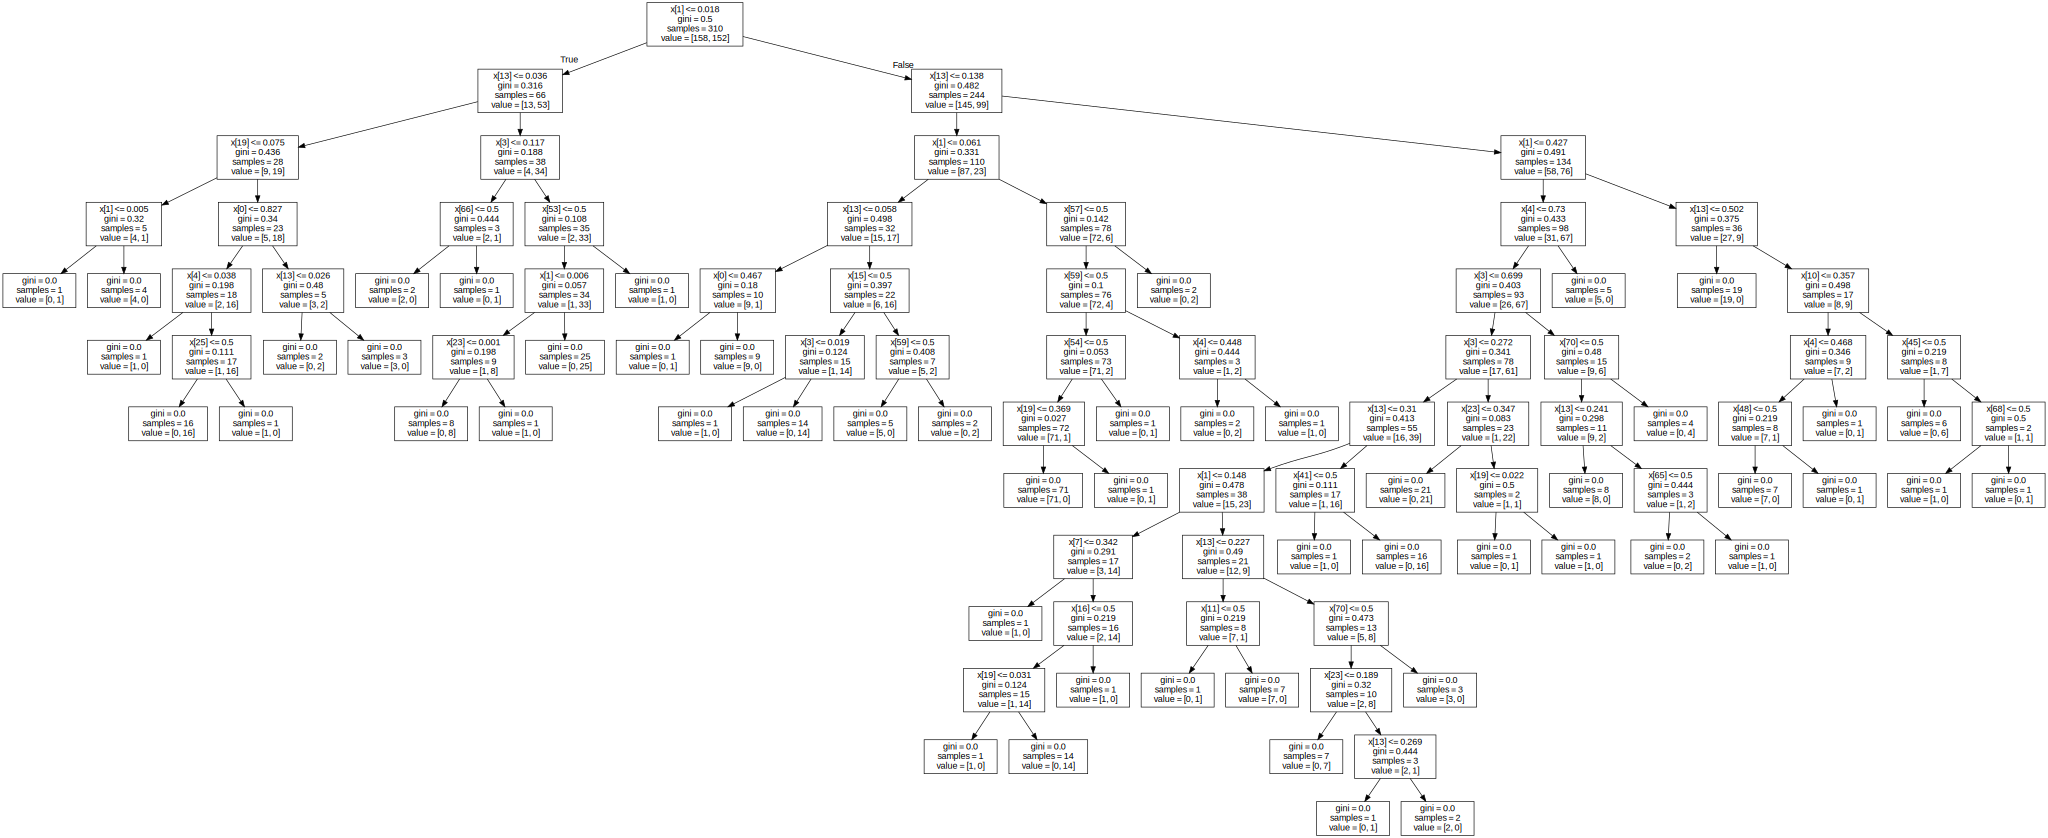

In [26]:
from graphviz import Source

# Load the DOT file
with open('tree.dot', 'r') as file:
    dot_data = file.read()

# Create a Source object from the DOT data
src = Source(dot_data)

# Display the graph
src

In [27]:
output_path = 'tree.png'
src.render(filename=output_path, format='png', cleanup=True)

'tree.png.png'